<a href="https://colab.research.google.com/github/mlacasa/Algebra-I/blob/main/AplicacionesLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicaciones Lineales
Las aplicaciones lineales son funciones entre espacios vectoriales que preservan las operaciones de suma vectorial y multiplicación por escalares. Son fundamentales en álgebra lineal y tienen numerosas aplicaciones en matemáticas, física e ingeniería.
##1. Núcleo e Imagen de una Aplicación Lineal
Definición Formal
Sea $T: V \rightarrow W$ una aplicación lineal entre espacios vectoriales.

El núcleo (o kernel) de $T$ es el conjunto de vectores de $V$ que $T$ envía al vector cero de $W$:

$$
\text{Ker}(T) = \{ v \in V : T(v) = 0_W \}
$$

La imagen (o rango) de $T$ es el conjunto de vectores en $W$ que son imágenes de algún vector en $V$:
$$
\text{Im}(T) = \{ T(v) : v \in V \} \subseteq W
$$

##Propiedades Fundamentales

El núcleo $\text{Ker}(T)$ es un subespacio vectorial de $V$.

La imagen $\text{Im}(T)$ es un subespacio vectorial de $W$.

###Teorema de la dimensión:
$\dim(V) = \dim(\text{Ker}(T)) + \dim(\text{Im}(T))$.

$T$ es inyectiva si y solo si $\text{Ker}(T) = {0_V}$.

$T$ es sobreyectiva si y solo si $\text{Im}(T) = W$.

Demostración Geométrica en Python
Veamos cómo visualizar el núcleo e imagen de aplicaciones lineales en $\mathbb{R}^2$ y $\mathbb{R}^3$:

Ejemplo 1: Proyección sobre el eje X en ℝ²


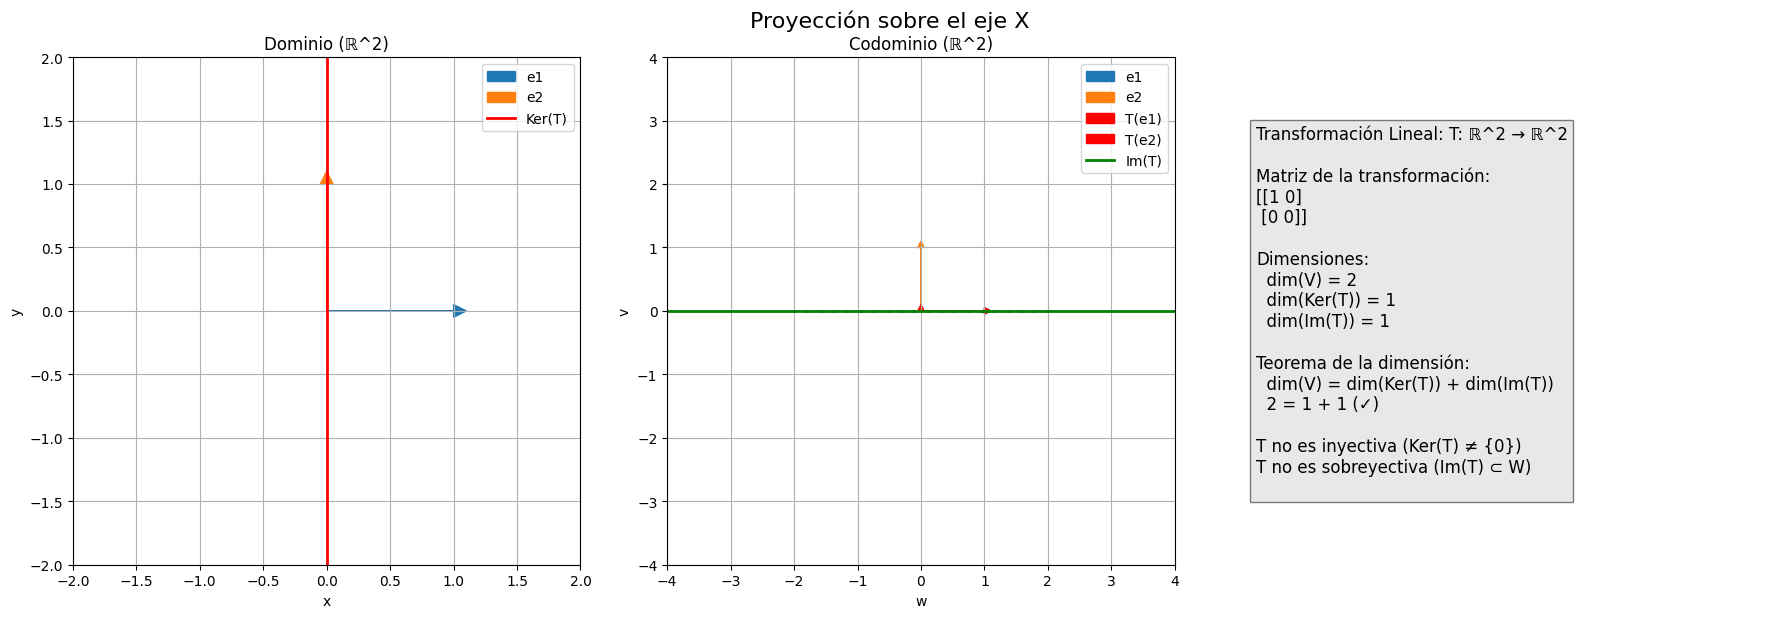


Ejemplo 2: Reflexión respecto al eje Y en ℝ²


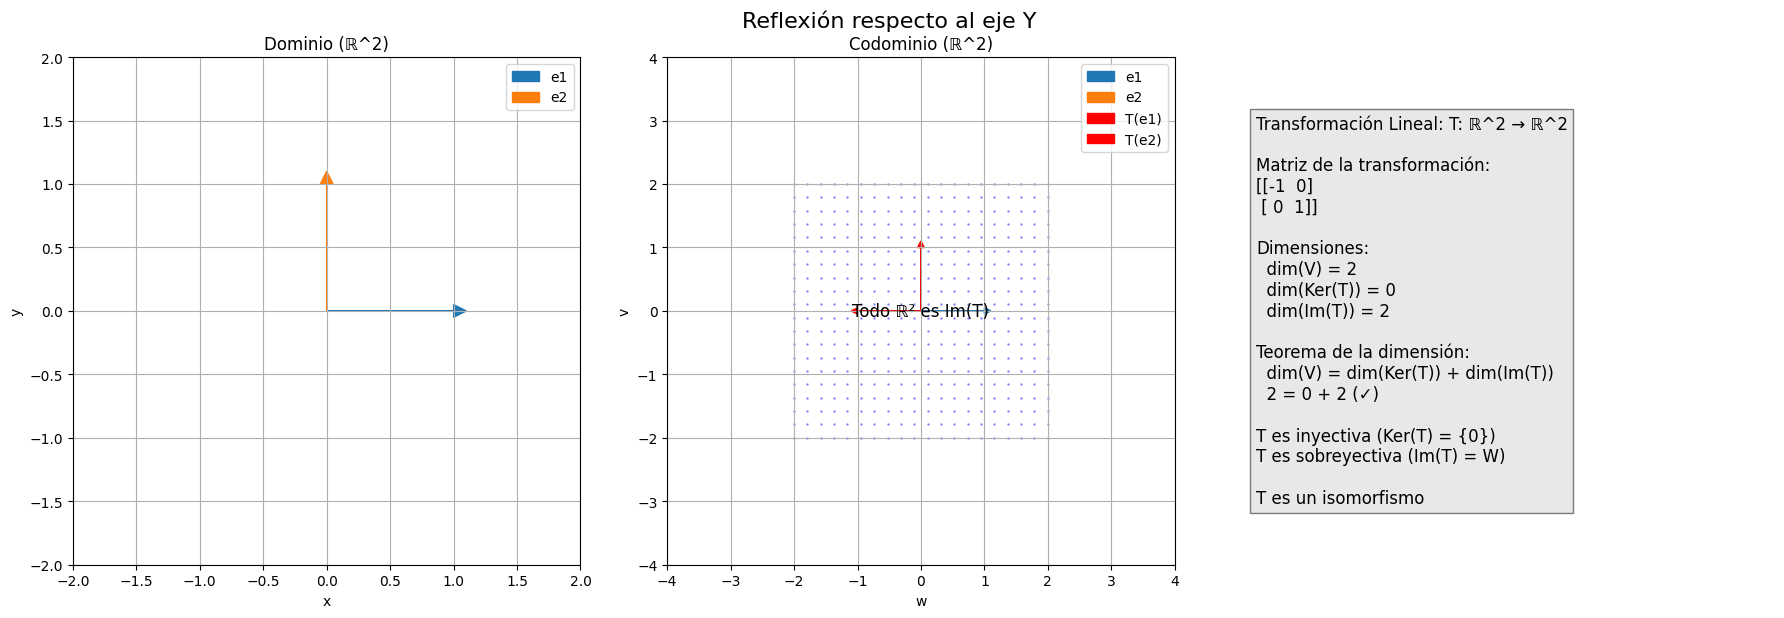


Ejemplo 3: Transformación con núcleo de dimensión 1 en ℝ³ → ℝ²


AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 1800x600 with 3 Axes>


Ejemplo 4: Transformación con núcleo de dimensión 2 en ℝ³ → ℝ¹


IndexError: index 1 is out of bounds for axis 1 with size 1

Error in callback <function _draw_all_if_interactive at 0x7886a211d580> (for post_execute):


AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 1800x600 with 2 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """Clase para dibujar flechas en 3D"""
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def plot_linear_transformation(T, domain_dim=2, codomain_dim=2, grid_size=20,
                              domain_limits=(-2, 2), codomain_limits=(-4, 4),
                              title="Transformación Lineal"):
    """
    Visualiza una transformación lineal, mostrando dominio, codominio, núcleo e imagen.

    Args:
        T: Matriz de la transformación lineal
        domain_dim: Dimensión del dominio
        codomain_dim: Dimensión del codominio
        grid_size: Número de puntos en la malla para visualización
        domain_limits: Límites para el dominio
        codomain_limits: Límites para el codominio
        title: Título del gráfico
    """
    # Crear figura
    fig = plt.figure(figsize=(18, 6))

    # Definir vectores de base según dimensión
    if domain_dim == 2:
        domain_basis = [np.array([1, 0]), np.array([0, 1])]
        x_label, y_label = 'x', 'y'
    else:  # domain_dim == 3
        domain_basis = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        x_label, y_label, z_label = 'x', 'y', 'z'

    if codomain_dim == 2:
        codomain_basis = [np.array([1, 0]), np.array([0, 1])]
        w_label, v_label = 'w', 'v'
    else:  # codomain_dim == 3
        codomain_basis = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        w_label, v_label, u_label = 'w', 'v', 'u'

    # 1. Dibujar el dominio
    if domain_dim == 2:
        ax1 = fig.add_subplot(131)
        ax1.set_aspect('equal')
        ax1.set_xlim(domain_limits)
        ax1.set_ylim(domain_limits)
        ax1.grid(True)
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.set_title(f"Dominio (ℝ^{domain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(domain_basis):
            ax1.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1,
                     fc=f'C{i}', ec=f'C{i}', label=f'e{i+1}')

        # Crear una malla de puntos para visualizar
        x = np.linspace(domain_limits[0], domain_limits[1], grid_size)
        y = np.linspace(domain_limits[0], domain_limits[1], grid_size)
        X, Y = np.meshgrid(x, y)

        # Vectorizar la transformación
        grid_points = np.column_stack([X.ravel(), Y.ravel()])
        transformed_points = np.zeros((grid_points.shape[0], codomain_dim))

        for i, point in enumerate(grid_points):
            transformed_points[i] = T @ point

        # Calcular el núcleo (resolver T*x = 0)
        U, S, Vh = np.linalg.svd(T)
        tol = 1e-10
        kernel_dim = sum(s < tol for s in S)
        kernel_basis = Vh[-kernel_dim:].T if kernel_dim > 0 else np.zeros((domain_dim, 0))

        # Dibujar el núcleo
        if kernel_dim == 1:
            # Dibujar una línea para el núcleo
            v = kernel_basis[:, 0]
            t = np.linspace(-max(domain_limits), max(domain_limits), 100)
            kernel_line = np.outer(t, v)
            ax1.plot(kernel_line[:, 0], kernel_line[:, 1], 'r-', linewidth=2, label='Ker(T)')
        elif kernel_dim == 2:
            # Todo el plano es el núcleo
            ax1.text(0, 0, "Todo ℝ² es Ker(T)", fontsize=12,
                    horizontalalignment='center', verticalalignment='center')
            ax1.set_facecolor('mistyrose')

        ax1.legend()

    else:  # domain_dim == 3
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.set_xlim(domain_limits)
        ax1.set_ylim(domain_limits)
        ax1.set_zlim(domain_limits)
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.set_zlabel(z_label)
        ax1.set_title(f"Dominio (ℝ^{domain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(domain_basis):
            a = Arrow3D([0, v[0]], [0, v[1]], [0, v[2]],
                       mutation_scale=20, lw=2, arrowstyle="-|>", color=f'C{i}')
            ax1.add_artist(a)
            ax1.text(v[0]*1.1, v[1]*1.1, v[2]*1.1, f'e{i+1}', fontsize=10)

        # Calcular el núcleo (resolver T*x = 0)
        U, S, Vh = np.linalg.svd(T)
        tol = 1e-10
        kernel_dim = sum(s < tol for s in S)
        kernel_basis = Vh[-kernel_dim:].T if kernel_dim > 0 else np.zeros((domain_dim, 0))

        # Dibujar el núcleo
        if kernel_dim == 1:
            # Dibujar una línea para el núcleo
            v = kernel_basis[:, 0]
            t = np.linspace(-max(domain_limits), max(domain_limits), 100)
            kernel_line = np.outer(t, v)
            ax1.plot(kernel_line[:, 0], kernel_line[:, 1], kernel_line[:, 2],
                    'r-', linewidth=2, label='Ker(T)')
        elif kernel_dim == 2:
            # Dibujar un plano para el núcleo
            v1 = kernel_basis[:, 0]
            v2 = kernel_basis[:, 1]
            # Crear una malla para el plano
            u = np.linspace(-2, 2, 10)
            v = np.linspace(-2, 2, 10)
            U, V = np.meshgrid(u, v)
            X = v1[0]*U + v2[0]*V
            Y = v1[1]*U + v2[1]*V
            Z = v1[2]*U + v2[2]*V
            ax1.plot_surface(X, Y, Z, alpha=0.3, color='red')
            ax1.text(v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2], "Ker(T)",
                    color='red', fontsize=10)
        elif kernel_dim == 3:
            # Todo el espacio es el núcleo
            ax1.text(0, 0, 0, "Todo ℝ³ es Ker(T)", fontsize=12)

    # 2. Dibujar el codominio y la imagen
    if codomain_dim == 2:
        ax2 = fig.add_subplot(132)
        ax2.set_aspect('equal')
        ax2.set_xlim(codomain_limits)
        ax2.set_ylim(codomain_limits)
        ax2.grid(True)
        ax2.set_xlabel(w_label)
        ax2.set_ylabel(v_label)
        ax2.set_title(f"Codominio (ℝ^{codomain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(codomain_basis):
            ax2.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1,
                     fc=f'C{i}', ec=f'C{i}', label=f'e{i+1}')

        # Calcular la imagen
        if domain_dim == 2:
            # Transformar los puntos de la malla del dominio
            transformed_X = transformed_points[:, 0].reshape(X.shape)
            transformed_Y = transformed_points[:, 1].reshape(Y.shape)

            # Visualizar la transformación de la malla
            ax2.scatter(transformed_X, transformed_Y, s=1, alpha=0.3, c='blue')

            # Visualizar la imagen de los vectores base
            for i, v in enumerate(domain_basis):
                w = T @ v
                ax2.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1,
                         fc='red', ec='red', label=f'T(e{i+1})')

            # Calcular y visualizar la imagen de la transformación
            image_dim = np.linalg.matrix_rank(T)

            if image_dim == 1:
                # La imagen es una línea
                v = T @ domain_basis[0]  # Cualquier vector no nulo servirá
                if np.allclose(v, 0):
                    v = T @ domain_basis[1]
                t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
                image_line = np.outer(t, v / np.linalg.norm(v))
                ax2.plot(image_line[:, 0], image_line[:, 1], 'g-',
                        linewidth=2, label='Im(T)')
            elif image_dim == 2:
                # La imagen es todo el plano
                ax2.text(0, 0, "Todo ℝ² es Im(T)", fontsize=12,
                        horizontalalignment='center', verticalalignment='center')
            else:
                # La imagen es solo el origen
                ax2.plot(0, 0, 'go', markersize=8, label='Im(T) = {0}')

        elif domain_dim == 3:
            # Crear puntos en el dominio
            t = np.linspace(domain_limits[0], domain_limits[1], grid_size)
            X, Y, Z = np.meshgrid(t, t, t)
            domain_points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

            # Aplicar la transformación a puntos aleatorios
            sample_indices = np.random.choice(domain_points.shape[0],
                                             size=min(1000, domain_points.shape[0]),
                                             replace=False)
            samples = domain_points[sample_indices]
            transformed_samples = np.array([T @ sample for sample in samples])

            # Visualizar los puntos transformados
            ax2.scatter(transformed_samples[:, 0], transformed_samples[:, 1],
                       s=1, alpha=0.3, c='blue')

            # Visualizar la imagen de los vectores base
            for i, v in enumerate(domain_basis):
                w = T @ v
                ax2.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1,
                         fc='red', ec='red', label=f'T(e{i+1})')

            # Calcular y visualizar la imagen de la transformación
            image_dim = np.linalg.matrix_rank(T)

            if image_dim == 1:
                # La imagen es una línea
                v = T @ domain_basis[0]  # Cualquier vector no nulo servirá
                if np.allclose(v, 0):
                    v = T @ domain_basis[1]
                if np.allclose(v, 0):
                    v = T @ domain_basis[2]
                t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
                image_line = np.outer(t, v / np.linalg.norm(v))
                ax2.plot(image_line[:, 0], image_line[:, 1], 'g-',
                        linewidth=2, label='Im(T)')
            elif image_dim == 2:
                ax2.text(0, 0, "Im(T) es ℝ²", fontsize=12,
                        horizontalalignment='center', verticalalignment='center')
                ax2.set_facecolor('palegreen')
            else:
                # La imagen es solo el origen
                ax2.plot(0, 0, 'go', markersize=8, label='Im(T) = {0}')

        ax2.legend()

    else:  # codomain_dim == 3
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.set_xlim(codomain_limits)
        ax2.set_ylim(codomain_limits)
        ax2.set_zlim(codomain_limits)
        ax2.set_xlabel(w_label)
        ax2.set_ylabel(v_label)
        ax2.set_zlabel(u_label)
        ax2.set_title(f"Codominio (ℝ^{codomain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(codomain_basis):
            a = Arrow3D([0, v[0]], [0, v[1]], [0, v[2]],
                       mutation_scale=20, lw=2, arrowstyle="-|>", color=f'C{i}')
            ax2.add_artist(a)
            ax2.text(v[0]*1.1, v[1]*1.1, v[2]*1.1, f'e{i+1}', fontsize=10)

        # Visualizar la imagen de los vectores base
        for i, v in enumerate(domain_basis):
            if i < len(domain_basis):
                w = T @ v
                a = Arrow3D([0, w[0]], [0, w[1]], [0, w[2]],
                           mutation_scale=20, lw=2, arrowstyle="-|>", color='red')
                ax2.add_artist(a)
                ax2.text(w[0]*1.1, w[1]*1.1, w[2]*1.1, f'T(e{i+1})',
                        color='red', fontsize=10)

        # Calcular y visualizar la imagen de la transformación
        image_dim = np.linalg.matrix_rank(T)

        if image_dim == 1:
            # La imagen es una línea
            v = None
            for basis_vector in domain_basis:
                if not np.allclose(T @ basis_vector, 0):
                    v = T @ basis_vector
                    break

            t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
            image_line = np.outer(t, v / np.linalg.norm(v))
            ax2.plot(image_line[:, 0], image_line[:, 1], image_line[:, 2],
                    'g-', linewidth=2)
            ax2.text(v[0]*1.5, v[1]*1.5, v[2]*1.5, "Im(T) (línea)",
                    color='green', fontsize=10)

        elif image_dim == 2:
            # La imagen es un plano
            # Encontrar dos vectores linealmente independientes en la imagen
            v1, v2 = None, None
            for i, basis_vector in enumerate(domain_basis):
                if v1 is None and not np.allclose(T @ basis_vector, 0):
                    v1 = T @ basis_vector
                elif v1 is not None and not np.allclose(T @ basis_vector, 0):
                    temp = T @ basis_vector
                    if not np.allclose(np.cross(v1, temp), 0):
                        v2 = temp
                        break

            if v1 is not None and v2 is not None:
                # Crear una malla para el plano
                u = np.linspace(-2, 2, 10)
                v = np.linspace(-2, 2, 10)
                U, V = np.meshgrid(u, v)
                X = v1[0]*U + v2[0]*V
                Y = v1[1]*U + v2[1]*V
                Z = v1[2]*U + v2[2]*V
                ax2.plot_surface(X, Y, Z, alpha=0.3, color='green')
                ax2.text(v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2],
                        "Im(T) (plano)", color='green', fontsize=10)

        elif image_dim == 3:
            # La imagen es todo el espacio
            ax2.text(0, 0, 0, "Todo ℝ³ es Im(T)", fontsize=12)

        else:
            # La imagen es solo el origen
            ax2.scatter([0], [0], [0], color='green', s=50)
            ax2.text(0.2, 0.2, 0.2, "Im(T) = {0}", color='green', fontsize=10)

    # 3. Visualizar la relación entre dimensiones
    ax3 = fig.add_subplot(133)
    ax3.axis('off')

    # Calcular dimensiones
    dim_V = domain_dim
    dim_W = codomain_dim
    dim_kernel = kernel_dim
    dim_image = image_dim

    # Verificar el teorema de la dimensión
    theorem_check = dim_V == dim_kernel + dim_image

    # Mostrar información sobre la transformación
    info_text = f"Transformación Lineal: T: ℝ^{dim_V} → ℝ^{dim_W}\n\n"
    info_text += f"Matriz de la transformación:\n{T}\n\n"
    info_text += f"Dimensiones:\n"
    info_text += f"  dim(V) = {dim_V}\n"
    info_text += f"  dim(Ker(T)) = {dim_kernel}\n"
    info_text += f"  dim(Im(T)) = {dim_image}\n\n"
    info_text += f"Teorema de la dimensión:\n"
    info_text += f"  dim(V) = dim(Ker(T)) + dim(Im(T))\n"
    info_text += f"  {dim_V} = {dim_kernel} + {dim_image} ({'✓' if theorem_check else '✗'})\n\n"

    if dim_kernel == 0:
        info_text += "T es inyectiva (Ker(T) = {0})\n"
    else:
        info_text += "T no es inyectiva (Ker(T) ≠ {0})\n"

    if dim_image == dim_W:
        info_text += "T es sobreyectiva (Im(T) = W)\n"
    else:
        info_text += "T no es sobreyectiva (Im(T) ⊂ W)\n"

    if dim_kernel == 0 and dim_image == dim_W:
        info_text += "\nT es un isomorfismo"

    ax3.text(0, 0.5, info_text, fontsize=12, va='center', ha='left',
             bbox=dict(facecolor='lightgray', alpha=0.5))

    # Ajustar el layout y mostrar el gráfico
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    return kernel_basis

# Ejemplos de transformaciones lineales
def demonstrate_kernel_image():
    """Demuestra el núcleo e imagen de varias transformaciones lineales"""

    print("Ejemplo 1: Proyección sobre el eje X en ℝ²")
    T1 = np.array([[1, 0], [0, 0]])
    kernel_basis1 = plot_linear_transformation(
        T1, domain_dim=2, codomain_dim=2,
        title="Proyección sobre el eje X"
    )

    print("\nEjemplo 2: Reflexión respecto al eje Y en ℝ²")
    T2 = np.array([[-1, 0], [0, 1]])
    kernel_basis2 = plot_linear_transformation(
        T2, domain_dim=2, codomain_dim=2,
        title="Reflexión respecto al eje Y"
    )

    print("\nEjemplo 3: Transformación con núcleo de dimensión 1 en ℝ³ → ℝ²")
    T3 = np.array([[1, 0, 1], [0, 1, 1]])
    kernel_basis3 = plot_linear_transformation(
        T3, domain_dim=3, codomain_dim=2,
        title="Transformación ℝ³ → ℝ² con núcleo de dimensión 1"
    )

    print("\nEjemplo 4: Transformación con núcleo de dimensión 2 en ℝ³ → ℝ¹")
    T4 = np.array([[1, 1, 1]])
    kernel_basis4 = plot_linear_transformation(
        T4, domain_dim=3, codomain_dim=2,
        title="Transformación ℝ³ → ℝ² con núcleo de dimensión 2"
    )

# Ejecutar la demostración
demonstrate_kernel_image()

Ejemplo 1: Proyección sobre el eje X en ℝ²


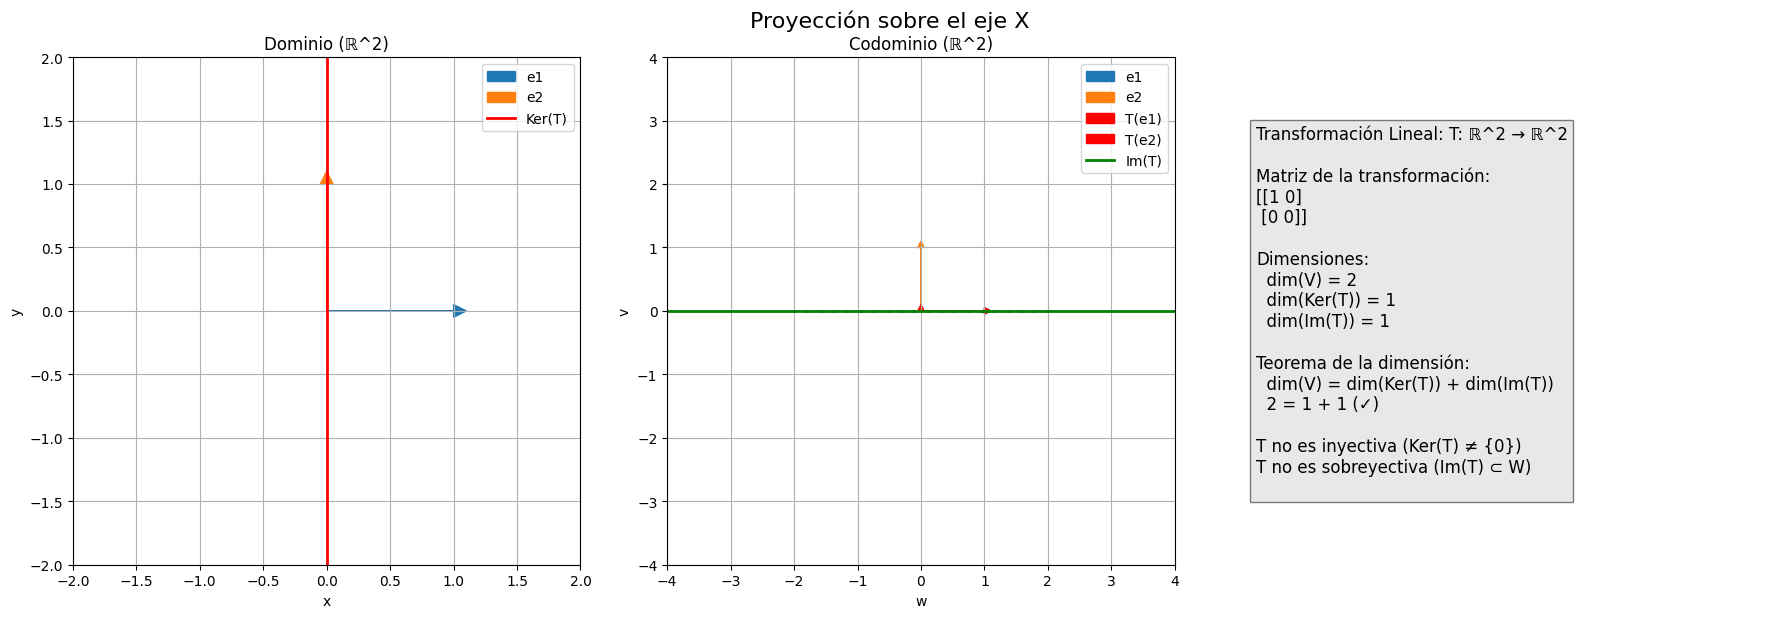


Ejemplo 2: Reflexión respecto al eje Y en ℝ²


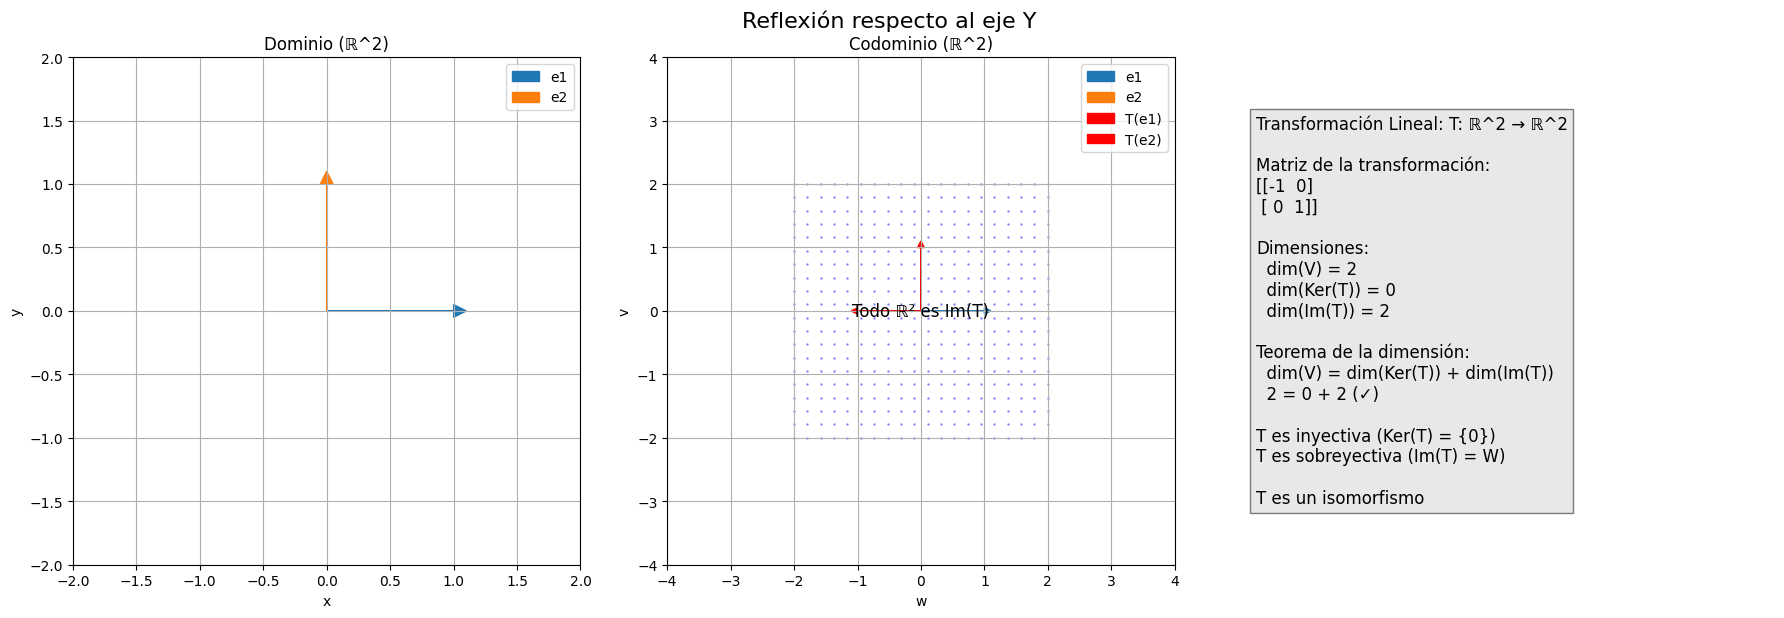


Ejemplo 3: Transformación con núcleo de dimensión 1 en ℝ³ → ℝ²


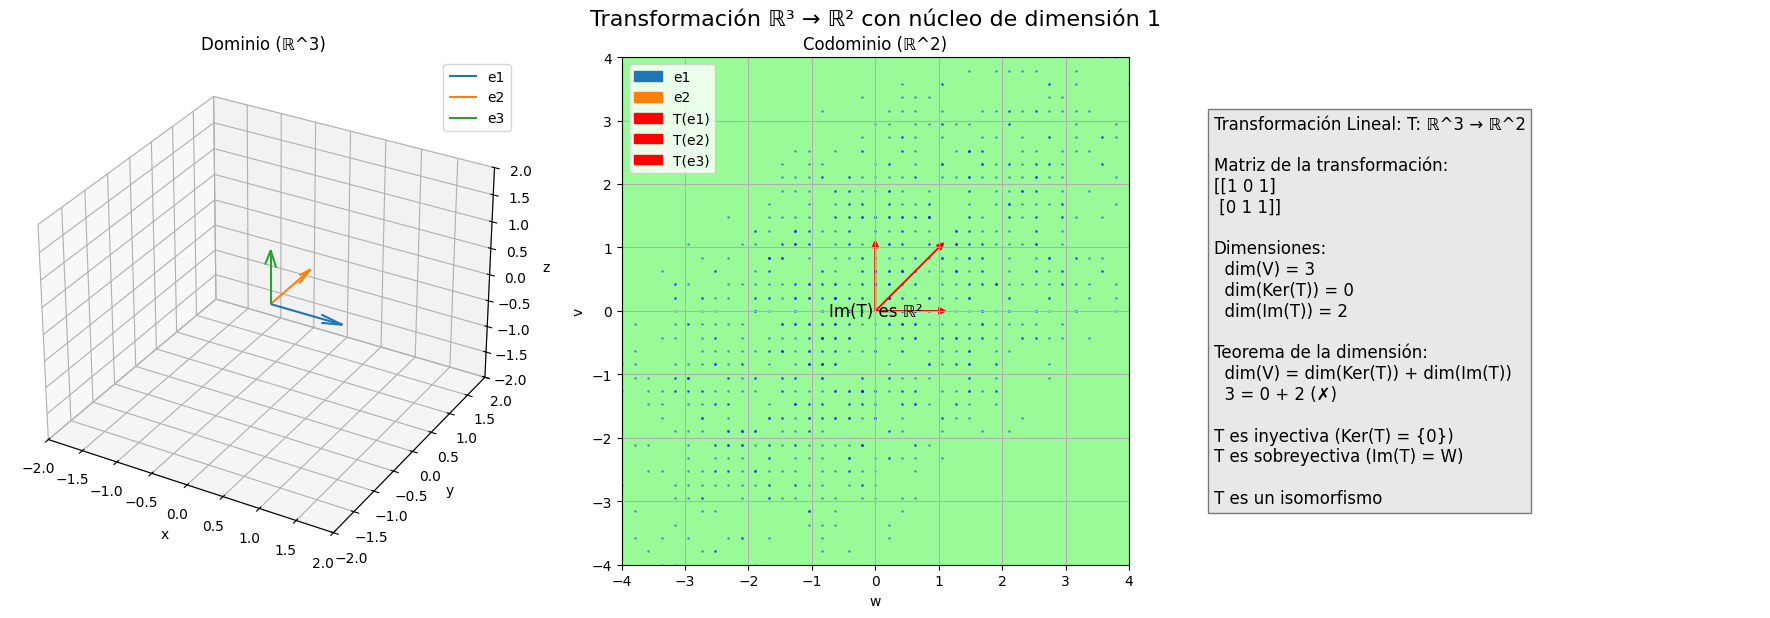


Ejemplo 4: Transformación con núcleo de dimensión 2 en ℝ³ → ℝ¹


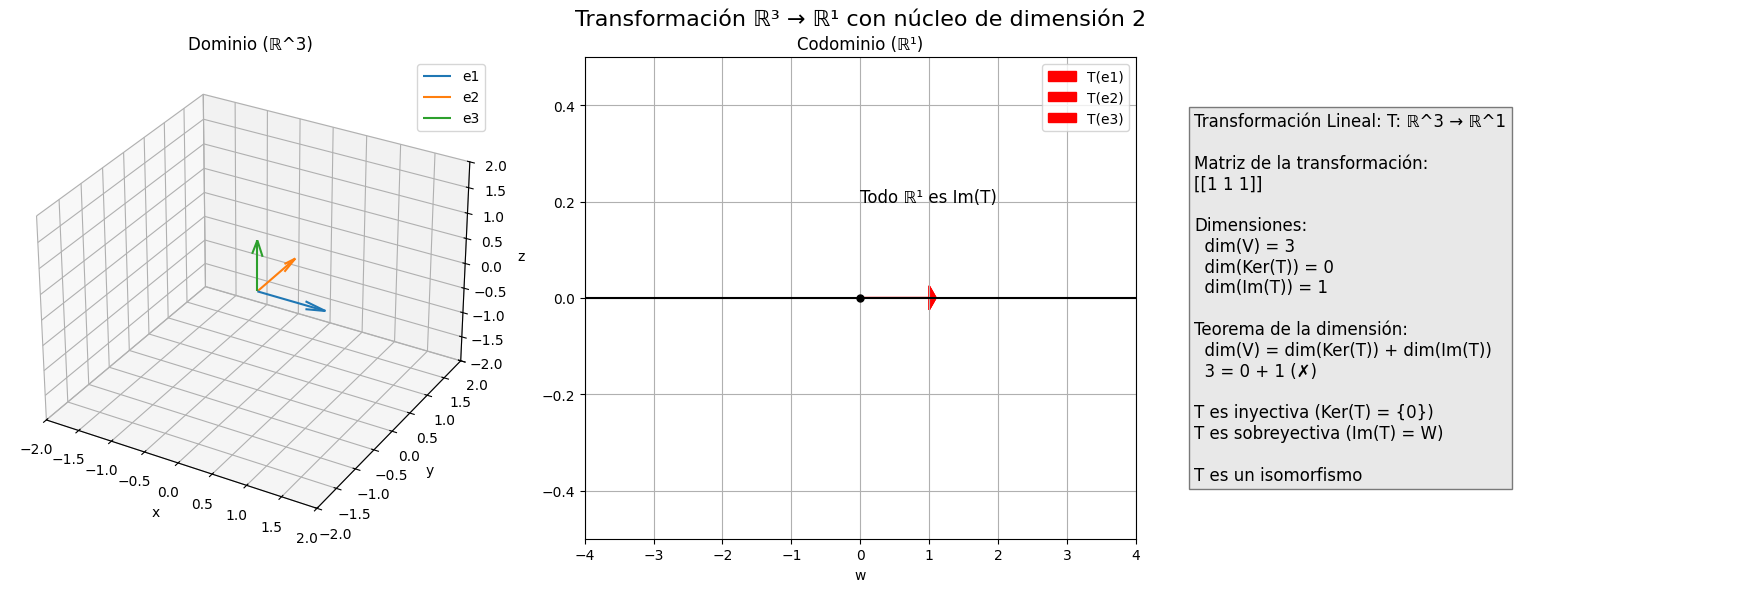

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_linear_transformation(T, domain_dim=2, codomain_dim=2, grid_size=20,
                              domain_limits=(-2, 2), codomain_limits=(-4, 4),
                              title="Transformación Lineal"):
    """
    Visualiza una transformación lineal, mostrando dominio, codominio, núcleo e imagen.

    Args:
        T: Matriz de la transformación lineal
        domain_dim: Dimensión del dominio
        codomain_dim: Dimensión del codominio
        grid_size: Número de puntos en la malla para visualización
        domain_limits: Límites para el dominio
        codomain_limits: Límites para el codominio
        title: Título del gráfico
    """
    # Crear figura
    fig = plt.figure(figsize=(18, 6))

    # Definir vectores de base según dimensión
    if domain_dim == 2:
        domain_basis = [np.array([1, 0]), np.array([0, 1])]
        x_label, y_label = 'x', 'y'
    else:  # domain_dim == 3
        domain_basis = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        x_label, y_label, z_label = 'x', 'y', 'z'

    if codomain_dim == 2:
        codomain_basis = [np.array([1, 0]), np.array([0, 1])]
        w_label, v_label = 'w', 'v'
    else:  # codomain_dim == 3
        codomain_basis = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        w_label, v_label, u_label = 'w', 'v', 'u'

    # 1. Dibujar el dominio
    if domain_dim == 2:
        ax1 = fig.add_subplot(131)
        ax1.set_aspect('equal')
        ax1.set_xlim(domain_limits)
        ax1.set_ylim(domain_limits)
        ax1.grid(True)
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.set_title(f"Dominio (ℝ^{domain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(domain_basis):
            ax1.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1,
                     fc=f'C{i}', ec=f'C{i}', label=f'e{i+1}')

        # Crear una malla de puntos para visualizar
        x = np.linspace(domain_limits[0], domain_limits[1], grid_size)
        y = np.linspace(domain_limits[0], domain_limits[1], grid_size)
        X, Y = np.meshgrid(x, y)

        # Vectorizar la transformación
        grid_points = np.column_stack([X.ravel(), Y.ravel()])
        transformed_points = np.zeros((grid_points.shape[0], codomain_dim))

        for i, point in enumerate(grid_points):
            transformed_points[i] = T @ point

        # Calcular el núcleo (resolver T*x = 0)
        U, S, Vh = np.linalg.svd(T)
        tol = 1e-10
        kernel_dim = sum(s < tol for s in S)
        kernel_basis = Vh[-kernel_dim:].T if kernel_dim > 0 else np.zeros((domain_dim, 0))

        # Dibujar el núcleo
        if kernel_dim == 1:
            # Dibujar una línea para el núcleo
            v = kernel_basis[:, 0]
            t = np.linspace(-max(domain_limits), max(domain_limits), 100)
            kernel_line = np.outer(t, v)
            ax1.plot(kernel_line[:, 0], kernel_line[:, 1], 'r-', linewidth=2, label='Ker(T)')
        elif kernel_dim == 2:
            # Todo el plano es el núcleo
            ax1.text(0, 0, "Todo ℝ² es Ker(T)", fontsize=12,
                    horizontalalignment='center', verticalalignment='center')
            ax1.set_facecolor('mistyrose')

        ax1.legend()

    else:  # domain_dim == 3
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.set_xlim(domain_limits)
        ax1.set_ylim(domain_limits)
        ax1.set_zlim(domain_limits)
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.set_zlabel(z_label)
        ax1.set_title(f"Dominio (ℝ^{domain_dim})")

        # Dibujar vectores de la base usando quiver en lugar de Arrow3D
        for i, v in enumerate(domain_basis):
            ax1.quiver(0, 0, 0, v[0], v[1], v[2], color=f'C{i}', label=f'e{i+1}')

        # Calcular el núcleo (resolver T*x = 0)
        U, S, Vh = np.linalg.svd(T)
        tol = 1e-10
        kernel_dim = sum(s < tol for s in S)
        kernel_basis = Vh[-kernel_dim:].T if kernel_dim > 0 else np.zeros((domain_dim, 0))

        # Dibujar el núcleo
        if kernel_dim == 1:
            # Dibujar una línea para el núcleo
            v = kernel_basis[:, 0]
            t = np.linspace(-max(domain_limits), max(domain_limits), 100)
            kernel_line = np.outer(t, v)
            ax1.plot(kernel_line[:, 0], kernel_line[:, 1], kernel_line[:, 2],
                    'r-', linewidth=2, label='Ker(T)')
        elif kernel_dim == 2:
            # Dibujar un plano para el núcleo
            v1 = kernel_basis[:, 0]
            v2 = kernel_basis[:, 1]
            # Crear una malla para el plano
            u = np.linspace(-2, 2, 10)
            v = np.linspace(-2, 2, 10)
            U, V = np.meshgrid(u, v)
            X = v1[0]*U + v2[0]*V
            Y = v1[1]*U + v2[1]*V
            Z = v1[2]*U + v2[2]*V
            ax1.plot_surface(X, Y, Z, alpha=0.3, color='red')
            ax1.text(v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2], "Ker(T)",
                    color='red', fontsize=10)
        elif kernel_dim == 3:
            # Todo el espacio es el núcleo
            ax1.text(0, 0, 0, "Todo ℝ³ es Ker(T)", fontsize=12)

        ax1.legend()

    # 2. Dibujar el codominio y la imagen
    if codomain_dim == 2:
        ax2 = fig.add_subplot(132)
        ax2.set_aspect('equal')
        ax2.set_xlim(codomain_limits)
        ax2.set_ylim(codomain_limits)
        ax2.grid(True)
        ax2.set_xlabel(w_label)
        ax2.set_ylabel(v_label)
        ax2.set_title(f"Codominio (ℝ^{codomain_dim})")

        # Dibujar vectores de la base
        for i, v in enumerate(codomain_basis):
            ax2.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1,
                     fc=f'C{i}', ec=f'C{i}', label=f'e{i+1}')

        # Calcular la imagen
        if domain_dim == 2:
            # Transformar los puntos de la malla del dominio
            transformed_X = transformed_points[:, 0].reshape(X.shape)
            transformed_Y = transformed_points[:, 1].reshape(Y.shape)

            # Visualizar la transformación de la malla
            ax2.scatter(transformed_X, transformed_Y, s=1, alpha=0.3, c='blue')

            # Visualizar la imagen de los vectores base
            for i, v in enumerate(domain_basis):
                w = T @ v
                ax2.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1,
                         fc='red', ec='red', label=f'T(e{i+1})')

            # Calcular y visualizar la imagen de la transformación
            image_dim = np.linalg.matrix_rank(T)

            if image_dim == 1:
                # La imagen es una línea
                v = T @ domain_basis[0]  # Cualquier vector no nulo servirá
                if np.allclose(v, 0):
                    v = T @ domain_basis[1]
                t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
                image_line = np.outer(t, v / np.linalg.norm(v))
                ax2.plot(image_line[:, 0], image_line[:, 1], 'g-',
                        linewidth=2, label='Im(T)')
            elif image_dim == 2:
                # La imagen es todo el plano
                ax2.text(0, 0, "Todo ℝ² es Im(T)", fontsize=12,
                        horizontalalignment='center', verticalalignment='center')
            else:
                # La imagen es solo el origen
                ax2.plot(0, 0, 'go', markersize=8, label='Im(T) = {0}')

        elif domain_dim == 3:
            # Crear puntos en el dominio
            t = np.linspace(domain_limits[0], domain_limits[1], grid_size)
            X, Y, Z = np.meshgrid(t, t, t)
            domain_points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

            # Aplicar la transformación a puntos aleatorios
            sample_indices = np.random.choice(domain_points.shape[0],
                                             size=min(1000, domain_points.shape[0]),
                                             replace=False)
            samples = domain_points[sample_indices]
            transformed_samples = np.array([T @ sample for sample in samples])

            # Visualizar los puntos transformados
            ax2.scatter(transformed_samples[:, 0], transformed_samples[:, 1],
                       s=1, alpha=0.3, c='blue')

            # Visualizar la imagen de los vectores base
            for i, v in enumerate(domain_basis):
                w = T @ v
                ax2.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1,
                         fc='red', ec='red', label=f'T(e{i+1})')

            # Calcular y visualizar la imagen de la transformación
            image_dim = np.linalg.matrix_rank(T)

            if image_dim == 1:
                # La imagen es una línea
                v = T @ domain_basis[0]  # Cualquier vector no nulo servirá
                if np.allclose(v, 0):
                    v = T @ domain_basis[1]
                if np.allclose(v, 0):
                    v = T @ domain_basis[2]
                t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
                image_line = np.outer(t, v / np.linalg.norm(v))
                ax2.plot(image_line[:, 0], image_line[:, 1], 'g-',
                        linewidth=2, label='Im(T)')
            elif image_dim == 2:
                ax2.text(0, 0, "Im(T) es ℝ²", fontsize=12,
                        horizontalalignment='center', verticalalignment='center')
                ax2.set_facecolor('palegreen')
            else:
                # La imagen es solo el origen
                ax2.plot(0, 0, 'go', markersize=8, label='Im(T) = {0}')

        ax2.legend()

    elif codomain_dim == 1:
        # Para el caso especial de codominio R¹, lo mostramos como una línea
        ax2 = fig.add_subplot(132)
        ax2.set_xlim(codomain_limits)
        ax2.set_ylim([-0.5, 0.5])  # Altura arbitraria para visualización
        ax2.grid(True)
        ax2.set_xlabel(w_label)
        ax2.set_title(f"Codominio (ℝ¹)")

        # Dibujar el eje
        ax2.axhline(y=0, color='k', linestyle='-')

        # Marcar el origen
        ax2.plot(0, 0, 'ko', markersize=5)

        # Visualizar la imagen de los vectores base
        for i, v in enumerate(domain_basis):
            w = T @ v
            ax2.arrow(0, 0, w[0], 0, head_width=0.05, head_length=0.1,
                     fc='red', ec='red', label=f'T(e{i+1})')

        # Calcular la imagen
        image_dim = np.linalg.matrix_rank(T)

        if image_dim == 1:
            # La imagen es toda la línea
            ax2.text(0, 0.2, "Todo ℝ¹ es Im(T)", fontsize=12)
        else:
            # La imagen es solo el origen
            ax2.plot(0, 0, 'go', markersize=8, label='Im(T) = {0}')

        ax2.legend()

    else:  # codomain_dim == 3
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.set_xlim(codomain_limits)
        ax2.set_ylim(codomain_limits)
        ax2.set_zlim(codomain_limits)
        ax2.set_xlabel(w_label)
        ax2.set_ylabel(v_label)
        ax2.set_zlabel(u_label)
        ax2.set_title(f"Codominio (ℝ^{codomain_dim})")

        # Dibujar vectores de la base usando quiver en lugar de Arrow3D
        for i, v in enumerate(codomain_basis):
            ax2.quiver(0, 0, 0, v[0], v[1], v[2], color=f'C{i}', label=f'e{i+1}')

        # Visualizar la imagen de los vectores base
        for i, v in enumerate(domain_basis):
            if i < len(domain_basis):
                w = T @ v
                ax2.quiver(0, 0, 0, w[0], w[1], w[2], color='red', label=f'T(e{i+1})')

        # Calcular y visualizar la imagen de la transformación
        image_dim = np.linalg.matrix_rank(T)

        if image_dim == 1:
            # La imagen es una línea
            v = None
            for basis_vector in domain_basis:
                if not np.allclose(T @ basis_vector, 0):
                    v = T @ basis_vector
                    break

            t = np.linspace(-max(codomain_limits), max(codomain_limits), 100)
            image_line = np.outer(t, v / np.linalg.norm(v))
            ax2.plot(image_line[:, 0], image_line[:, 1], image_line[:, 2],
                    'g-', linewidth=2)
            ax2.text(v[0]*1.5, v[1]*1.5, v[2]*1.5, "Im(T) (línea)",
                    color='green', fontsize=10)

        elif image_dim == 2:
            # La imagen es un plano
            # Encontrar dos vectores linealmente independientes en la imagen
            v1, v2 = None, None
            for i, basis_vector in enumerate(domain_basis):
                if v1 is None and not np.allclose(T @ basis_vector, 0):
                    v1 = T @ basis_vector
                elif v1 is not None and not np.allclose(T @ basis_vector, 0):
                    temp = T @ basis_vector
                    if not np.allclose(np.cross(v1, temp), 0):
                        v2 = temp
                        break

            if v1 is not None and v2 is not None:
                # Crear una malla para el plano
                u = np.linspace(-2, 2, 10)
                v = np.linspace(-2, 2, 10)
                U, V = np.meshgrid(u, v)
                X = v1[0]*U + v2[0]*V
                Y = v1[1]*U + v2[1]*V
                Z = v1[2]*U + v2[2]*V
                ax2.plot_surface(X, Y, Z, alpha=0.3, color='green')
                ax2.text(v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2],
                        "Im(T) (plano)", color='green', fontsize=10)

        elif image_dim == 3:
            # La imagen es todo el espacio
            ax2.text(0, 0, 0, "Todo ℝ³ es Im(T)", fontsize=12)

        else:
            # La imagen es solo el origen
            ax2.scatter([0], [0], [0], color='green', s=50)
            ax2.text(0.2, 0.2, 0.2, "Im(T) = {0}", color='green', fontsize=10)

        ax2.legend()

    # 3. Visualizar la relación entre dimensiones
    ax3 = fig.add_subplot(133)
    ax3.axis('off')

    # Calcular dimensiones
    dim_V = domain_dim
    dim_W = codomain_dim
    dim_kernel = kernel_dim
    dim_image = image_dim

    # Verificar el teorema de la dimensión
    theorem_check = dim_V == dim_kernel + dim_image

    # Mostrar información sobre la transformación
    info_text = f"Transformación Lineal: T: ℝ^{dim_V} → ℝ^{dim_W}\n\n"
    info_text += f"Matriz de la transformación:\n{T}\n\n"
    info_text += f"Dimensiones:\n"
    info_text += f"  dim(V) = {dim_V}\n"
    info_text += f"  dim(Ker(T)) = {dim_kernel}\n"
    info_text += f"  dim(Im(T)) = {dim_image}\n\n"
    info_text += f"Teorema de la dimensión:\n"
    info_text += f"  dim(V) = dim(Ker(T)) + dim(Im(T))\n"
    info_text += f"  {dim_V} = {dim_kernel} + {dim_image} ({'✓' if theorem_check else '✗'})\n\n"

    if dim_kernel == 0:
        info_text += "T es inyectiva (Ker(T) = {0})\n"
    else:
        info_text += "T no es inyectiva (Ker(T) ≠ {0})\n"

    if dim_image == dim_W:
        info_text += "T es sobreyectiva (Im(T) = W)\n"
    else:
        info_text += "T no es sobreyectiva (Im(T) ⊂ W)\n"

    if dim_kernel == 0 and dim_image == dim_W:
        info_text += "\nT es un isomorfismo"

    ax3.text(0, 0.5, info_text, fontsize=12, va='center', ha='left',
             bbox=dict(facecolor='lightgray', alpha=0.5))

    # Ajustar el layout y mostrar el gráfico
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    return kernel_basis

# Ejemplos de transformaciones lineales
def demonstrate_kernel_image():
    """Demuestra el núcleo e imagen de varias transformaciones lineales"""

    print("Ejemplo 1: Proyección sobre el eje X en ℝ²")
    T1 = np.array([[1, 0], [0, 0]])
    kernel_basis1 = plot_linear_transformation(
        T1, domain_dim=2, codomain_dim=2,
        title="Proyección sobre el eje X"
    )

    print("\nEjemplo 2: Reflexión respecto al eje Y en ℝ²")
    T2 = np.array([[-1, 0], [0, 1]])
    kernel_basis2 = plot_linear_transformation(
        T2, domain_dim=2, codomain_dim=2,
        title="Reflexión respecto al eje Y"
    )

    print("\nEjemplo 3: Transformación con núcleo de dimensión 1 en ℝ³ → ℝ²")
    T3 = np.array([[1, 0, 1], [0, 1, 1]])
    kernel_basis3 = plot_linear_transformation(
        T3, domain_dim=3, codomain_dim=2,
        title="Transformación ℝ³ → ℝ² con núcleo de dimensión 1"
    )

    print("\nEjemplo 4: Transformación con núcleo de dimensión 2 en ℝ³ → ℝ¹")
    T4 = np.array([[1, 1, 1]])
    kernel_basis4 = plot_linear_transformation(
        T4, domain_dim=3, codomain_dim=1,
        title="Transformación ℝ³ → ℝ¹ con núcleo de dimensión 2"
    )

# Ejecutar la demostración
if __name__ == "__main__":
    demonstrate_kernel_image()

# 2. Tipos de Aplicaciones Lineales

Las aplicaciones lineales se pueden clasificar según sus propiedades de inyectividad y sobreyectividad:

## Inyectiva (Monomorfismo)

Una aplicación lineal $T: V \rightarrow W$ es inyectiva si vectores diferentes del dominio siempre se transforman en vectores diferentes del codominio. Formalmente:
$$
T(v_1) = T(v_2) \implies v_1 = v_2
$$

Equivalentemente, una aplicación lineal es inyectiva si y solo si su núcleo contiene únicamente al vector cero:
$$
\text{Ker}(T) = \{0_V\}
$$

## Sobreyectiva (Epimorfismo)

Una aplicación lineal $T: V \rightarrow W$ es sobreyectiva si todo vector del codominio es imagen de algún vector del dominio. Formalmente:
$$
\forall w \in W, \exists v \in V : T(v) = w
$$

Equivalentemente, una aplicación lineal es sobreyectiva si y solo si su imagen es todo el codominio:
$$
\text{Im}(T) = W
$$

## Biyectiva (Isomorfismo)

Una aplicación lineal $T: V \rightarrow W$ es biyectiva si es tanto inyectiva como sobreyectiva. En este caso, existe una única aplicación lineal inversa $T^{-1}: W \rightarrow V$ tal que:
$$
T^{-1}(T(v)) = v \quad \forall v \in V
$$
$$
T(T^{-1}(w)) = w \quad \forall w \in W
$$

Dos espacios vectoriales son isomorfos si existe un isomorfismo entre ellos. Esto significa que son esencialmente "el mismo" desde el punto de vista algebraico, aunque puedan tener diferentes representaciones.

## Ejemplos Comunes

1. **Proyección:** $P: \mathbb{R}^3 \rightarrow \mathbb{R}^2$ que proyecta puntos en el plano XY.
    - No es inyectiva (puntos con diferentes coordenadas Z se proyectan al mismo punto).
    - Es sobreyectiva (todo punto del plano XY es imagen de algún punto en el espacio).

2. **Rotación:** $R: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ que rota vectores en el plano.
    - Es inyectiva (vectores diferentes se transforman en vectores diferentes).
    - Es sobreyectiva (todo vector del plano puede obtenerse rotando algún otro vector).
    - Es un isomorfismo.

3. **Inclusión:** $I: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ que envía $(x, y) \mapsto (x, y, 0)$.
    - Es inyectiva (vectores diferentes del plano se transforman en vectores diferentes del espacio).
    - No es sobreyectiva (solo se alcanza el plano XY, no todo el espacio).

4. **Transformación nula:** $Z: V \rightarrow W$ definida como $Z(v) = 0_W$ para todo $v \in V$.
    - No es inyectiva para $\dim(V) > 0$ (todos los vectores se transforman en el cero).
    - Es sobreyectiva solo si $W = \{0_W\}$ (el codominio solo contiene al vector cero).


# 3. Matriz de una Aplicación Lineal

## Definición Formal

Toda aplicación lineal entre espacios vectoriales de dimensión finita puede representarse mediante una matriz, una vez que se han elegido bases para el dominio y el codominio.

Sean $V$ y $W$ espacios vectoriales de dimensiones $n$ y $m$ respectivamente, con bases:

- $B_V = \{v_1, v_2, \ldots, v_n\}$ para $V$
- $B_W = \{w_1, w_2, \ldots, w_m\}$ para $W$

Si $T: V \rightarrow W$ es una aplicación lineal, entonces la matriz de $T$ respecto a estas bases, denotada $[T]_{B_V}^{B_W}$, se construye de la siguiente manera:

1. Para cada vector base $v_j$ del dominio, calculamos su imagen $T(v_j)$.
2. Expresamos $T(v_j)$ como combinación lineal de los vectores de la base $B_W$:
   $$
   T(v_j) = a_{1j}w_1 + a_{2j}w_2 + \ldots + a_{mj}w_m
   $$

Los coeficientes $a_{ij}$ forman la columna $j$ de la matriz:

$$
[T]_{B_V}^{B_W} =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
$$

# Propiedades de la Matriz de una Aplicación Lineal

1. **Unicidad:** Para un par de bases fijas, la matriz que representa a una aplicación lineal es única.

2. **Dimensiones:** Si $T: V \rightarrow W$, entonces $[T]_{B_V}^{B_W}$ es una matriz $m \times n$, donde $m = \dim(W)$ y $n = \dim(V)$.

3. **Composición:** Si $S: U \rightarrow V$ y $T: V \rightarrow W$ son aplicaciones lineales, entonces:
   $$
   [T \circ S]_{B_U}^{B_W} = [T]_{B_V}^{B_W} \cdot [S]_{B_U}^{B_V}
   $$

4. **Cambio de base:** Si $P_{B_V \rightarrow B'_V}$ es la matriz de cambio de base en $V$ y $P_{B_W \rightarrow B'_W}$ en $W$, entonces:
   $$
   [T]_{B'_V}^{B'_W} = P_{B_W \rightarrow B'_W}^{-1} \cdot [T]_{B_V}^{B_W} \cdot P_{B_V \rightarrow B'_V}
   $$

## Ejemplo Numérico: Rotación en $\mathbb{R}^3$

Consideremos la aplicación lineal $R: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ que representa una rotación de 90° alrededor del eje Z.

### Paso 1: Determinar cómo actúa la transformación sobre los vectores base

En la base canónica $B = \{e_1 = (1,0,0), e_2 = (0,1,0), e_3 = (0,0,1)\}$:

- $R(e_1) = (0,1,0) = 0 \cdot e_1 + 1 \cdot e_2 + 0 \cdot e_3$
- $R(e_2) = (-1,0,0) = -1 \cdot e_1 + 0 \cdot e_2 + 0 \cdot e_3$
- $R(e_3) = (0,0,1) = 0 \cdot e_1 + 0 \cdot e_2 + 1 \cdot e_3$

### Paso 2: Construir la matriz

Colocando estos coeficientes como columnas:
$$
[R]_B^B =
\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

### Paso 3: Verificar cómo transforma vectores específicos

Para verificar, comprobemos cómo actúa sobre un vector cualquiera, por ejemplo $v = (1,1,1)$:
$$
R(v) = [R]_B^B \cdot v =
\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} =
\begin{pmatrix}
-1 \\
1 \\
1
\end{pmatrix}
$$

Lo que corresponde efectivamente a rotar el vector $(1,1,1)$ 90° alrededor del eje Z.

# Ejemplo Numérico: Proyección sobre un Plano en $\mathbb{R}^3$

Consideremos ahora la aplicación lineal $P: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ que proyecta vectores ortogonalmente sobre el plano XY.

### Paso 1: Determinar cómo actúa la transformación sobre los vectores base

En la base canónica $B = \{e_1 = (1,0,0), e_2 = (0,1,0), e_3 = (0,0,1)\}$:

- $P(e_1) = (1,0,0) = 1 \cdot e_1 + 0 \cdot e_2 + 0 \cdot e_3$
- $P(e_2) = (0,1,0) = 0 \cdot e_1 + 1 \cdot e_2 + 0 \cdot e_3$
- $P(e_3) = (0,0,0) = 0 \cdot e_1 + 0 \cdot e_2 + 0 \cdot e_3$

### Paso 2: Construir la matriz

Colocando estos coeficientes como columnas:
$$
[P]_B^B =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

### Paso 3: Verificar cómo transforma vectores específicos

Para verificar, comprobemos cómo actúa sobre un vector cualquiera, por ejemplo $v = (2,3,4)$:
$$
P(v) = [P]_B^B \cdot v =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
2 \\
3 \\
4
\end{pmatrix} =
\begin{pmatrix}
2 \\
3 \\
0
\end{pmatrix}
$$

Lo que efectivamente elimina la componente Z del vector, proyectándolo sobre el plano XY.

Ejemplo 1: Rotación de 90° alrededor del eje Z


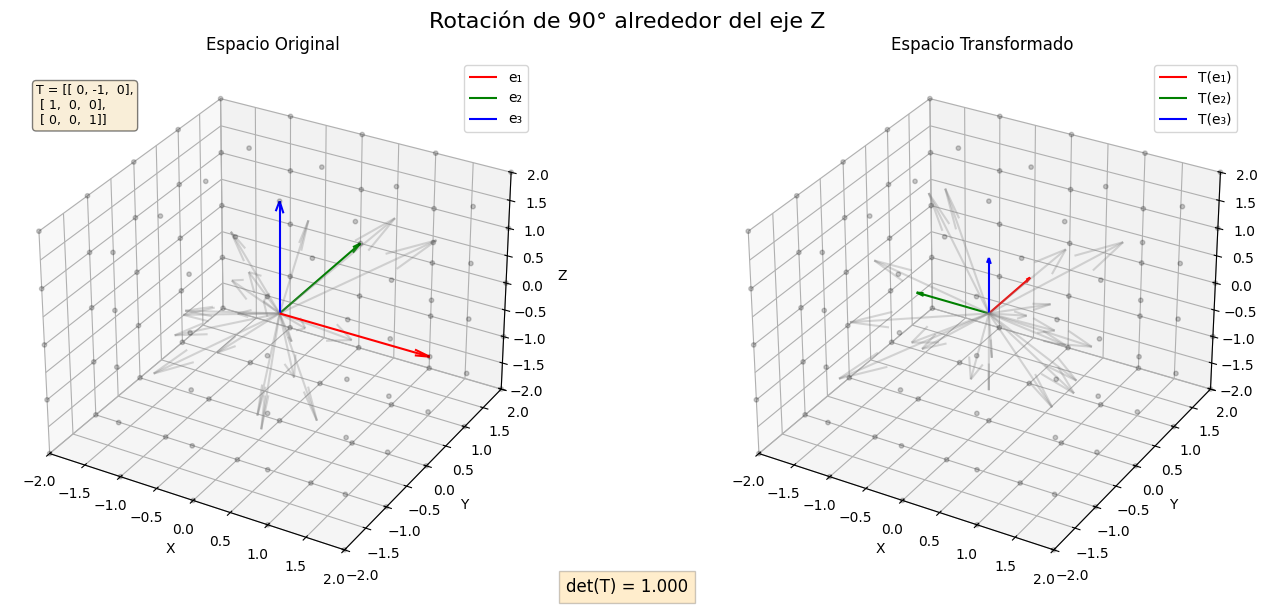


Ejemplo 2: Proyección sobre el plano XY


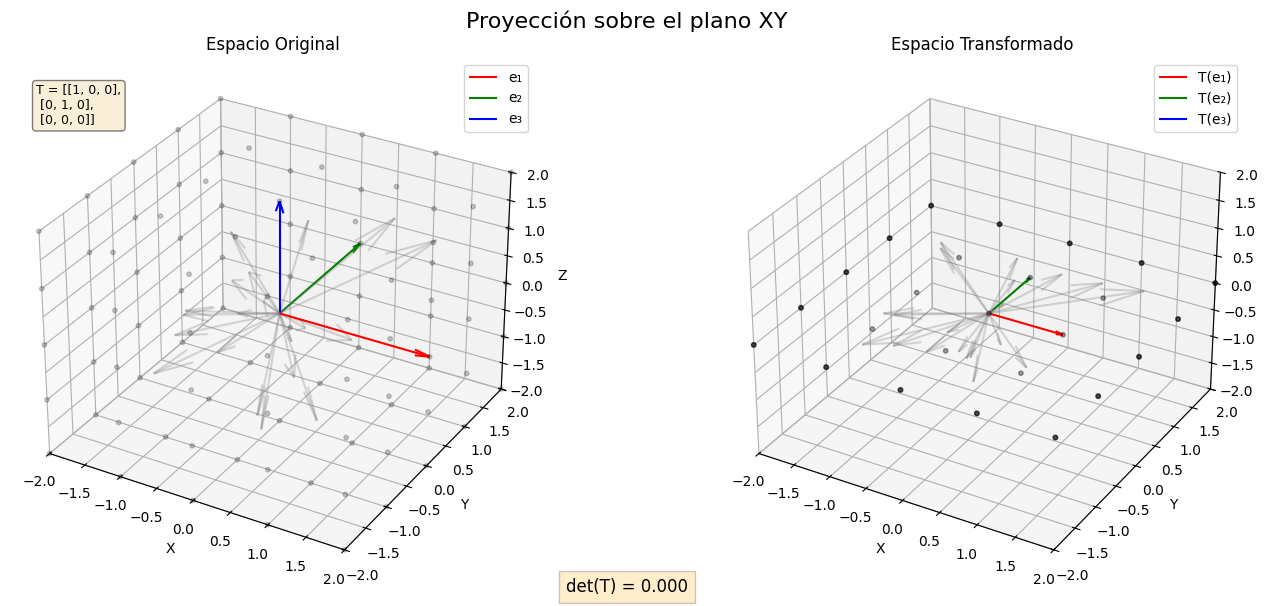


Ejemplo 3: Reflexión respecto al plano XY


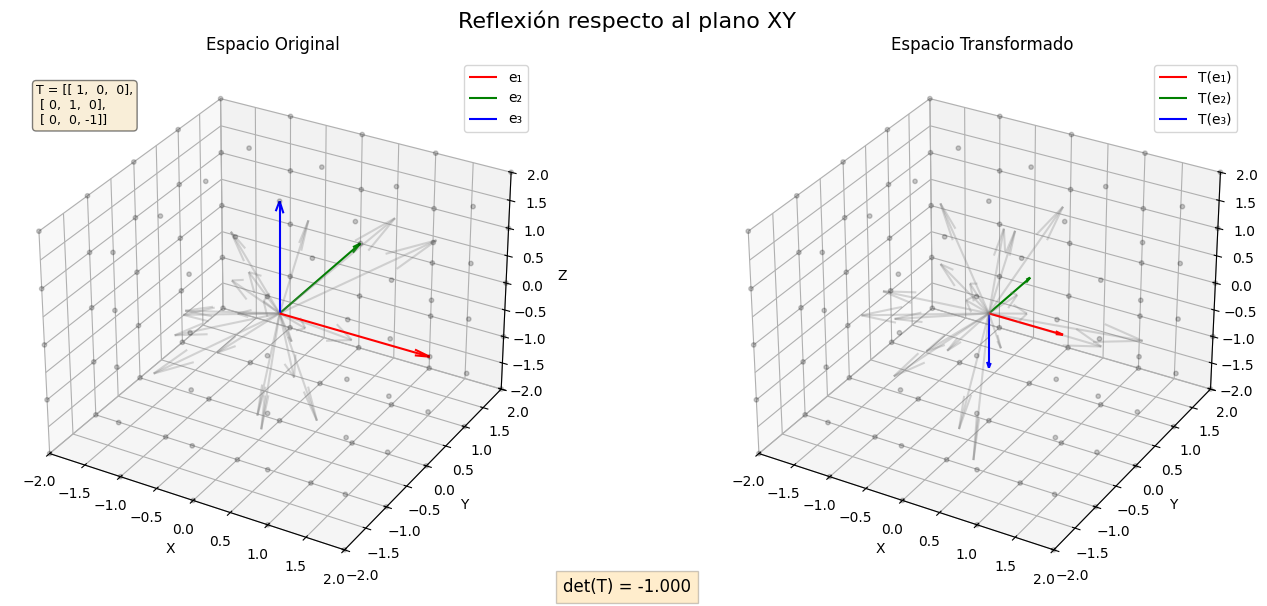


Ejemplo 4: Estiramiento en dirección del eje X


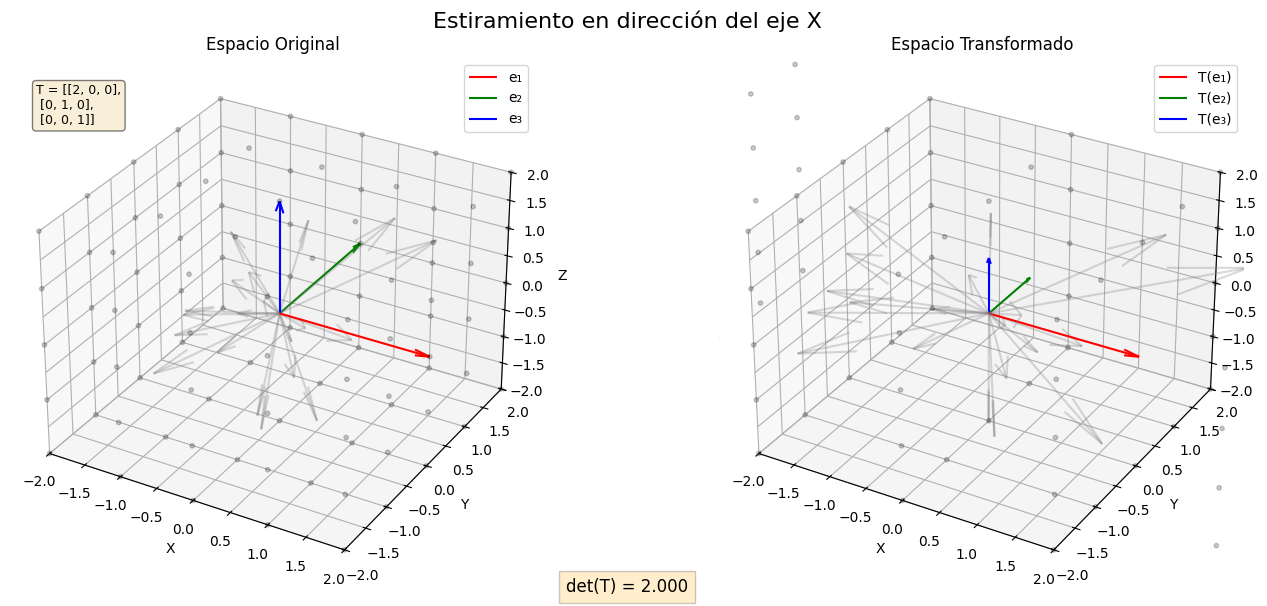


Ejemplo 5: Transformación de cizalla (shear)


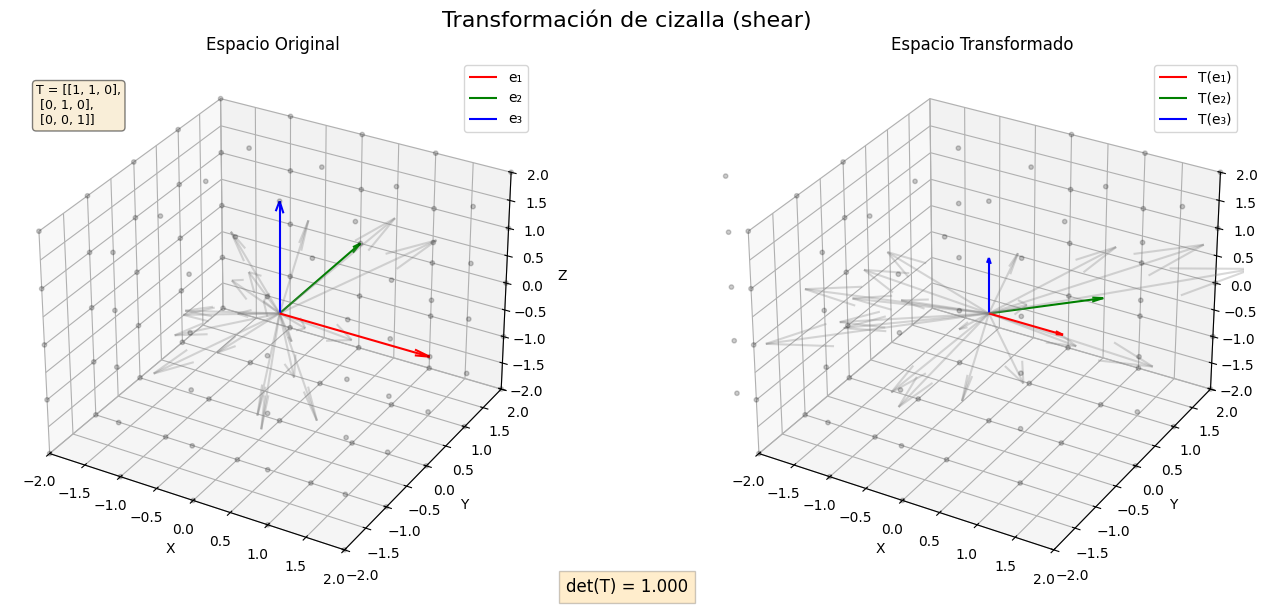


Ejemplo 6: Composición de transformaciones
Primero estiramiento en X, luego rotación de 45° alrededor del eje Z


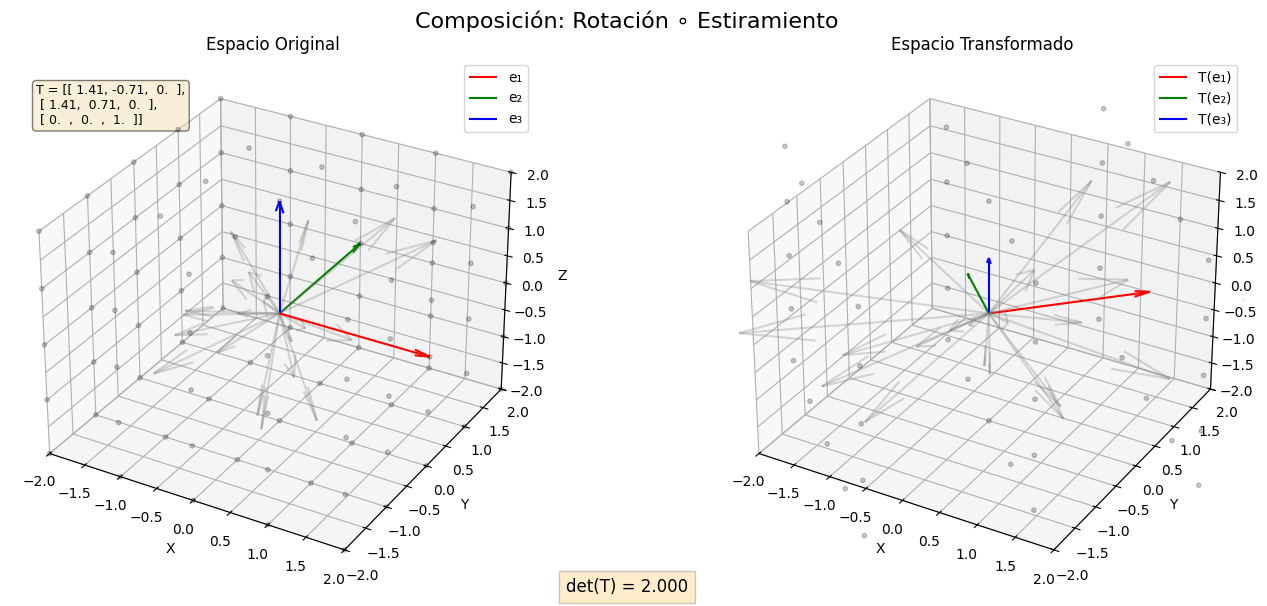


Ejemplo 7: Rotación expresada en una base no canónica
Base: v₁=(1,1,0), v₂=(0,1,1), v₃=(1,0,1)

Matriz en la nueva base:
[[ 0. -1.  0.]
 [ 1.  1.  1.]
 [-1.  0.  0.]]


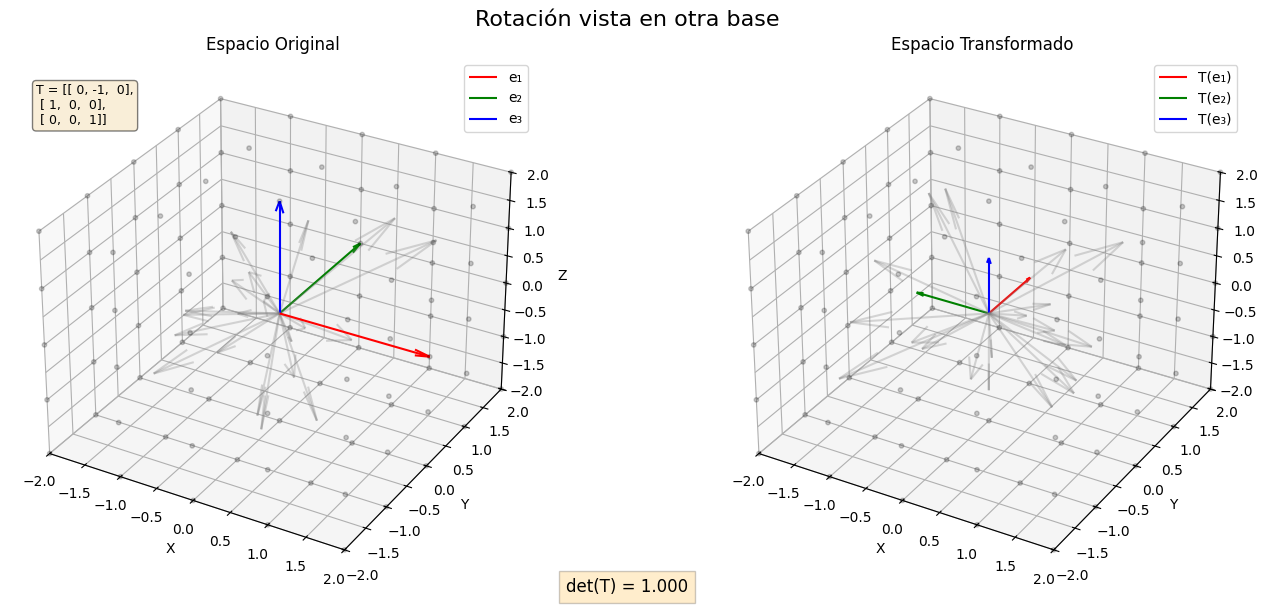

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

def plot_linear_transformation_3d(T, title="Transformación Lineal en R³", num_vectors=20, anim=False):
    """
    Visualiza una transformación lineal en R³, mostrando cómo se transforman vectores.

    Args:
        T: Matriz 3x3 de la transformación lineal
        title: Título del gráfico
        num_vectors: Número de vectores aleatorios a visualizar
        anim: Si es True, crea una animación de la transformación
    """
    # Crear figura
    fig = plt.figure(figsize=(15, 6))

    # Vectores de base canónica
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Límites para los ejes
    axis_limit = 2

    # Crear grid de puntos para visualizar
    x = np.linspace(-axis_limit, axis_limit, 5)
    y = np.linspace(-axis_limit, axis_limit, 5)
    z = np.linspace(-axis_limit, axis_limit, 5)

    # Generar puntos de grid y vectores aleatorios
    grid_points = []
    for xi in x:
        for yi in y:
            for zi in z:
                if abs(xi) == axis_limit or abs(yi) == axis_limit or abs(zi) == axis_limit:
                    grid_points.append(np.array([xi, yi, zi]))

    # Generar vectores aleatorios
    np.random.seed(42)  # Para reproducibilidad
    random_vectors = []
    for _ in range(num_vectors):
        v = np.random.uniform(-1.5, 1.5, 3)
        random_vectors.append(v)

    # Transformar los vectores
    transformed_vectors = [T @ v for v in random_vectors]
    transformed_grid = [T @ p for p in grid_points]

    # Transformar los vectores base
    Te1 = T @ e1
    Te2 = T @ e2
    Te3 = T @ e3

    if not anim:
        # 1. Espacio original
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.set_xlim([-axis_limit, axis_limit])
        ax1.set_ylim([-axis_limit, axis_limit])
        ax1.set_zlim([-axis_limit, axis_limit])
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title("Espacio Original")

        # Dibujar los ejes coordenados
        ax1.quiver(0, 0, 0, axis_limit, 0, 0, color='r', arrow_length_ratio=0.1, label='e₁')
        ax1.quiver(0, 0, 0, 0, axis_limit, 0, color='g', arrow_length_ratio=0.1, label='e₂')
        ax1.quiver(0, 0, 0, 0, 0, axis_limit, color='b', arrow_length_ratio=0.1, label='e₃')

        # Dibujar los vectores aleatorios
        for v in random_vectors:
            ax1.quiver(0, 0, 0, v[0], v[1], v[2], color='gray', alpha=0.3)

        # Dibujar los puntos del grid
        grid_x = [p[0] for p in grid_points]
        grid_y = [p[1] for p in grid_points]
        grid_z = [p[2] for p in grid_points]
        ax1.scatter(grid_x, grid_y, grid_z, color='black', alpha=0.2, s=10)

        # 2. Espacio transformado
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.set_xlim([-axis_limit, axis_limit])
        ax2.set_ylim([-axis_limit, axis_limit])
        ax2.set_zlim([-axis_limit, axis_limit])
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.set_title("Espacio Transformado")

        # Dibujar los ejes transformados
        ax2.quiver(0, 0, 0, Te1[0], Te1[1], Te1[2], color='r', arrow_length_ratio=0.1, label='T(e₁)')
        ax2.quiver(0, 0, 0, Te2[0], Te2[1], Te2[2], color='g', arrow_length_ratio=0.1, label='T(e₂)')
        ax2.quiver(0, 0, 0, Te3[0], Te3[1], Te3[2], color='b', arrow_length_ratio=0.1, label='T(e₃)')

        # Dibujar los vectores transformados
        for v in transformed_vectors:
            ax2.quiver(0, 0, 0, v[0], v[1], v[2], color='gray', alpha=0.3)

        # Dibujar los puntos del grid transformado
        grid_tx = [p[0] for p in transformed_grid]
        grid_ty = [p[1] for p in transformed_grid]
        grid_tz = [p[2] for p in transformed_grid]
        ax2.scatter(grid_tx, grid_ty, grid_tz, color='black', alpha=0.2, s=10)

        # Mostrar el determinante
        det_T = np.linalg.det(T)
        plt.figtext(0.5, 0.01, f"det(T) = {det_T:.3f}", ha="center", fontsize=12,
                   bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

        # Mostrar la matriz
        matrix_str = np.array2string(T, precision=2, separator=', ')
        ax1.text2D(0.05, 0.95, f"T = {matrix_str}", transform=ax1.transAxes, fontsize=9,
                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        ax1.legend()
        ax2.legend()

    else:
        # Configurar gráfico para animación
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim([-axis_limit, axis_limit])
        ax.set_ylim([-axis_limit, axis_limit])
        ax.set_zlim([-axis_limit, axis_limit])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)

        # Dibujar los ejes coordenados originales (fijos)
        ax.quiver(0, 0, 0, axis_limit, 0, 0, color='r', alpha=0.3, arrow_length_ratio=0.1, label='e₁')
        ax.quiver(0, 0, 0, 0, axis_limit, 0, color='g', alpha=0.3, arrow_length_ratio=0.1, label='e₂')
        ax.quiver(0, 0, 0, 0, 0, axis_limit, color='b', alpha=0.3, arrow_length_ratio=0.1, label='e₃')

        # Objetos para la animación
        vectors = []
        for v in random_vectors:
            vector = ax.quiver(0, 0, 0, v[0], v[1], v[2], color='gray', alpha=0.5)
            vectors.append(vector)

        # Puntos del grid
        grid_x = [p[0] for p in grid_points]
        grid_y = [p[1] for p in grid_points]
        grid_z = [p[2] for p in grid_points]
        points = ax.scatter(grid_x, grid_y, grid_z, color='black', alpha=0.2, s=10)

        # Ejes transformados (inicialmente iguales a los originales)
        axis1 = ax.quiver(0, 0, 0, 1, 0, 0, color='r', arrow_length_ratio=0.1, label='T(e₁)')
        axis2 = ax.quiver(0, 0, 0, 0, 1, 0, color='g', arrow_length_ratio=0.1, label='T(e₂)')
        axis3 = ax.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1, label='T(e₃)')

        ax.legend()

        # Función de actualización para la animación
        def update(frame):
            # Interpolar entre la identidad y la transformación final
            t = frame / 20  # 20 frames para la animación completa
            current_T = t * T + (1-t) * np.eye(3)

            # Actualizar los ejes transformados
            axis1.remove()
            axis2.remove()
            axis3.remove()

            current_e1 = current_T @ e1
            current_e2 = current_T @ e2
            current_e3 = current_T @ e3

            axis1 = ax.quiver(0, 0, 0, current_e1[0], current_e1[1], current_e1[2],
                             color='r', arrow_length_ratio=0.1)
            axis2 = ax.quiver(0, 0, 0, current_e2[0], current_e2[1], current_e2[2],
                             color='g', arrow_length_ratio=0.1)
            axis3 = ax.quiver(0, 0, 0, current_e3[0], current_e3[1], current_e3[2],
                             color='b', arrow_length_ratio=0.1)

            # Actualizar los vectores
            for i, vector in enumerate(vectors):
                vector.remove()
                current_v = current_T @ random_vectors[i]
                vectors[i] = ax.quiver(0, 0, 0, current_v[0], current_v[1], current_v[2],
                                     color='gray', alpha=0.5)

            # Actualizar los puntos del grid
            current_grid = [current_T @ p for p in grid_points]
            current_x = [p[0] for p in current_grid]
            current_y = [p[1] for p in current_grid]
            current_z = [p[2] for p in current_grid]
            points._offsets3d = (current_x, current_y, current_z)

            # Mostrar el determinante actual
            det = np.linalg.det(current_T)
            plt.suptitle(f"{title}\ndet(T) = {det:.3f}", fontsize=14)

            return [axis1, axis2, axis3] + vectors + [points]

        # Crear la animación
        ani = FuncAnimation(fig, update, frames=21, interval=100, blit=False)

        # La siguiente línea es para mostrar la animación en un notebook
        # Si estás en otro entorno, puedes guardarla con ani.save('linear_transform.gif')
        plt.close()  # Evita mostrar la figura dos veces en un notebook
        return ani

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Ejemplos de matrices de aplicaciones lineales
def demonstrate_transformation_matrices():
    """Demuestra diferentes matrices de aplicaciones lineales en R³"""

    print("Ejemplo 1: Rotación de 90° alrededor del eje Z")
    # Matriz de rotación 90° alrededor del eje Z
    R_z = np.array([
        [0, -1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])
    plot_linear_transformation_3d(R_z, title="Rotación de 90° alrededor del eje Z")

    print("\nEjemplo 2: Proyección sobre el plano XY")
    # Matriz de proyección sobre el plano XY
    P_xy = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ])
    plot_linear_transformation_3d(P_xy, title="Proyección sobre el plano XY")

    print("\nEjemplo 3: Reflexión respecto al plano XY")
    # Matriz de reflexión respecto al plano XY (cambia el signo de Z)
    Ref_xy = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, -1]
    ])
    plot_linear_transformation_3d(Ref_xy, title="Reflexión respecto al plano XY")

    print("\nEjemplo 4: Estiramiento en dirección del eje X")
    # Matriz de estiramiento en dirección X (duplica la coordenada X)
    S_x = np.array([
        [2, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    plot_linear_transformation_3d(S_x, title="Estiramiento en dirección del eje X")

    print("\nEjemplo 5: Transformación de cizalla (shear)")
    # Matriz de cizalla (shear) que desplaza X proporcionalmente a Y
    Sh = np.array([
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    plot_linear_transformation_3d(Sh, title="Transformación de cizalla (shear)")

    # Opcional: Crear una animación para una transformación específica
    # Para ejecutar esto, necesitarás un entorno que soporte animaciones
    # Descomenta las siguientes líneas para crear una animación
    # print("\nCreando animación para la rotación...")
    # ani = plot_linear_transformation_3d(R_z, title="Rotación de 90° alrededor del eje Z", anim=True)
    # ani.save('rotation.gif', writer='pillow')

# Ejecutar la demostración
demonstrate_transformation_matrices()

# Ejemplo adicional: Componer transformaciones
def compose_transformations():
    """Demuestra la composición de transformaciones lineales"""

    # Rotación de 45° alrededor del eje Z
    theta = np.pi/4  # 45°
    R_z = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    # Estiramiento en dirección X
    S_x = np.array([
        [2, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

    # Componer las transformaciones: primero estirar, luego rotar
    RS = R_z @ S_x

    print("\nEjemplo 6: Composición de transformaciones")
    print("Primero estiramiento en X, luego rotación de 45° alrededor del eje Z")
    plot_linear_transformation_3d(RS, title="Composición: Rotación ∘ Estiramiento")

# Ejemplos adicionales con matrices respecto a bases no canónicas
def non_canonical_bases():
    """Demuestra transformaciones lineales con bases no canónicas"""

    # Definir una base no canónica para R³
    v1 = np.array([1, 1, 0])
    v2 = np.array([0, 1, 1])
    v3 = np.array([1, 0, 1])

    # Matriz de cambio de base de la canónica a la nueva base
    P = np.column_stack([v1, v2, v3])

    # Matriz de cambio de base inversa
    P_inv = np.linalg.inv(P)

    # Una transformación sencilla en la base canónica (por ejemplo, rotación 90° en Z)
    R_z = np.array([
        [0, -1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])

    # La misma transformación expresada en la base no canónica
    R_z_new = P_inv @ R_z @ P

    print("\nEjemplo 7: Rotación expresada en una base no canónica")
    print("Base: v₁=(1,1,0), v₂=(0,1,1), v₃=(1,0,1)")

    # Esta es la matriz que aplicaríamos a las coordenadas en la base no canónica
    print("\nMatriz en la nueva base:")
    print(R_z_new)

    # Para visualizar, usamos la matriz en la base canónica
    # pero mostramos los vectores de la base alternativa
    plot_linear_transformation_3d(R_z, title="Rotación vista en otra base")

# Ejecutar ejemplos adicionales
compose_transformations()
non_canonical_bases()

# Ejemplo Numérico: Cambio de Base en una Aplicación Lineal

Consideremos un operador de reflexión $S: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ respecto a la recta $y = x$.

### Paso 1: Matriz en la base canónica

En la base canónica $B = \{e_1 = (1,0), e_2 = (0,1)\}$:

- $S(e_1) = (0,1)$
- $S(e_2) = (1,0)$

Por lo tanto:
$$
[S]_B^B =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

### Paso 2: Cambio a una base diferente

Consideremos ahora la base $B' = \{v_1 = (1,1), v_2 = (1,-1)\}$. Para expresar $S$ en esta base, necesitamos:

1. Encontrar la matriz de cambio de base $P_{B \rightarrow B'}$.
2. Calcular $[S]_{B'}^{B'} = P_{B \rightarrow B'}^{-1} \cdot [S]_{B}^B \cdot P_{B \rightarrow B'}$.

#### Paso 2.1: Matriz de cambio de base

La matriz de cambio de base tiene como columnas las coordenadas de los vectores de $B'$ en términos de $B$:
$$
P_{B \rightarrow B'} =
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

Su inversa es:
$$
P_{B \rightarrow B'}^{-1} = \frac{1}{2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

#### Paso 2.2: Calculamos la matriz en la nueva base

Ahora, calculamos:
$$
\begin{align*}
[S]_{B'}^{B'} &= P_{B \rightarrow B'}^{-1} \cdot [S]_{B}^B \cdot P_{B \rightarrow B'} \\
&= \frac{1}{2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \cdot
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \\
&= \frac{1}{2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix} \\
&= \frac{1}{2}
\begin{pmatrix}
2 & 0 \\
0 & -2
\end{pmatrix} \\
&=
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\end{align*}
$$

Observamos que en la base $B'$, el operador de reflexión es diagonal, con valores propios 1 y -1. Esto tiene sentido geométricamente, pues $v_1 = (1,1)$ está sobre la recta $y = x$ y queda invariante bajo la reflexión, mientras que $v_2 = (1,-1)$ es perpendicular a la recta y cambia de signo.

# Aplicaciones Importantes

## 1. Núcleo e Imagen a partir de la Matriz

Dada la matriz $[T]_{B_V}^{B_W}$ de una aplicación lineal, podemos:

- Calcular el núcleo resolviendo el sistema homogéneo:
  $$
  [T]_{B_V}^{B_W} \cdot x = 0
  $$
- Calcular la imagen encontrando el span de las columnas de $[T]_{B_V}^{B_W}$.

## 2. Clasificación de Aplicaciones Lineales

La matriz también nos permite clasificar fácilmente una aplicación lineal:

- $T$ es inyectiva si y solo si las columnas de $[T]_{B_V}^{B_W}$ son linealmente independientes.
- $T$ es sobreyectiva si y solo si las filas de $[T]_{B_V}^{B_W}$ generan todo $\mathbb{R}^m$.
- $T$ es un isomorfismo si y solo si $[T]_{B_V}^{B_W}$ es una matriz cuadrada invertible.

## 3. Teorema del Rango

La matriz nos permite verificar directamente el teorema de la dimensión:
$$
\dim(V) = \dim(\text{Ker}(T)) + \dim(\text{Im}(T))
$$
donde $\dim(\text{Ker}(T))$ es la dimensión del espacio nulo de la matriz y $\dim(\text{Im}(T))$ es el rango de la matriz.

# Transformaciones Especiales en $\mathbb{R}^3$

## Rotación alrededor de un eje arbitrario

Para una rotación de ángulo $\theta$ alrededor de un eje con vector director unitario $\vec{u} = (u_x, u_y, u_z)$, la matriz es:
$$
R =
\begin{pmatrix}
\cos\theta + u_x^2(1 - \cos\theta) & u_x u_y(1 - \cos\theta) - u_z \sin\theta & u_x u_z(1 - \cos\theta) + u_y \sin\theta \\
u_y u_x(1 - \cos\theta) + u_z \sin\theta & \cos\theta + u_y^2(1 - \cos\theta) & u_y u_z(1 - \cos\theta) - u_x \sin\theta \\
u_z u_x(1 - \cos\theta) - u_y \sin\theta & u_z u_y(1 - \cos\theta) + u_x \sin\theta & \cos\theta + u_z^2(1 - \cos\theta)
\end{pmatrix}
$$

## Proyección sobre un subespacio

Para proyectar ortogonalmente sobre un subespacio con base ortonormal $\{v_1, v_2, \ldots, v_k\}$, la matriz es:
$$
P = v_1 v_1^T + v_2 v_2^T + \ldots + v_k v_k^T
$$
donde $v_i v_i^T$ representa el producto exterior que da una matriz $n \times n$.

## Reflexión respecto a un hiperplano

Para reflejar respecto a un hiperplano con vector normal unitario $\vec{n}$, la matriz es:
$$
\text{Ref} = I - 2\vec{n}\vec{n}^T
$$
donde $I$ es la matriz identidad.

# 4. Endomorfismos

## Definición y Conceptos Básicos

Un **endomorfismo** es una aplicación lineal de un espacio vectorial en sí mismo. Formalmente, si $V$ es un espacio vectorial, un endomorfismo es una aplicación lineal $T: V \rightarrow V$.

Los endomorfismos son particularmente importantes porque:

1. Forman un álgebra bajo la composición.
2. Pueden estudiarse a través de sus valores y vectores propios.
3. Tienen aplicaciones prácticas como rotaciones, reflexiones, proyecciones, etc.

El conjunto de todos los endomorfismos de un espacio vectorial $V$ se denota como $\text{End}(V)$, y tiene estructura de álgebra sobre el cuerpo de escalares.

## Propiedades Específicas de los Endomorfismos

### Matriz Cuadrada

Si $V$ tiene dimensión $n$, entonces cualquier endomorfismo $T: V \rightarrow V$ se representa mediante una matriz cuadrada $n \times n$ respecto a una base dada.

### Valores y Vectores Propios

Un escalar $\lambda$ es un **valor propio** de $T$ si existe un vector no nulo $v \in V$ tal que:

$$
T(v) = \lambda v
$$

El vector $v$ se llama **vector propio** asociado al valor propio $\lambda$.

Los valores propios se pueden calcular resolviendo la ecuación:

$$
\det(T - \lambda I) = 0
$$

donde $I$ es la matriz identidad de tamaño $n \times n$.

### Polinomio Característico

El **polinomio característico** de un endomorfismo $T$ es:

$$
p_T(\lambda) = \det(T - \lambda I)
$$

Este polinomio tiene grado $n$ (la dimensión del espacio), y sus raíces son los valores propios de $T$.

### Diagonalización

Un endomorfismo $T$ es **diagonalizable** si existe una base de $V$ formada por vectores propios de $T$. En tal caso, la matriz de $T$ respecto a esta base es diagonal:

$$
[T]_B =
\begin{pmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n
\end{pmatrix}
$$

donde $\lambda_1, \lambda_2, \ldots, \lambda_n$ son los valores propios de $T$.

## Clasificación de Endomorfismos

### Nilpotentes

Un endomorfismo $T$ es **nilpotente** si existe un entero positivo $k$ tal que $T^k = 0$ (donde $T^k$ denota la composición de $T$ consigo mismo $k$ veces).

### Idempotentes

Un endomorfismo $T$ es **idempotente** si $T^2 = T$. Las proyecciones son ejemplos típicos de endomorfismos idempotentes.

### Involutivos

Un endomorfismo $T$ es **involutivo** si $T^2 = I$ (donde $I$ es la identidad). Las reflexiones son ejemplos de endomorfismos involutivos.

## Ejemplo Numérico: Rotación en $\mathbb{R}^3$

Consideremos una rotación de 120° alrededor del eje que pasa por el origen y tiene vector director $(1,1,1)$.

### Paso 1: Construir la matriz de rotación

Para una rotación de ángulo $\theta$ alrededor de un eje con vector director unitario $\vec{u}$, la matriz se puede calcular usando la fórmula de Rodrigues:

$$
R = I + \sin\theta \cdot K + (1 - \cos\theta) \cdot K^2
$$

donde $K$ es la matriz antisimétrica:

$$
K =
\begin{pmatrix}
0 & -u_z & u_y \\
u_z & 0 & -u_x \\
-u_y & u_x & 0
\end{pmatrix}
$$

Para nuestro caso:
- $\theta = 120° = \frac{2\pi}{3}$ radianes
- $\vec{u} = \frac{1}{\sqrt{3}}(1,1,1)$ (normalizado)

Calculando:

$$
K =
\begin{pmatrix}
0 & -\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}} & 0 & -\frac{1}{\sqrt{3}} \\
-\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & 0
\end{pmatrix}
$$

$$
K^2 =
\begin{pmatrix}
-\frac{2}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & -\frac{2}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & -\frac{2}{3}
\end{pmatrix}
$$

Sustituyendo en la fórmula:

$$
R = I + \sin\left(\frac{2\pi}{3}\right) \cdot K + \left(1 - \cos\left(\frac{2\pi}{3}\right)\right) \cdot K^2
$$

$$
R = I + \frac{\sqrt{3}}{2} \cdot K + \frac{3}{2} \cdot K^2
$$

Después de los cálculos, obtenemos:

$$
R =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
$$

Esta matriz representa una permutación cíclica de las coordenadas $(x,y,z) \rightarrow (z,x,y)$, que efectivamente rota 120° alrededor del eje $(1,1,1)$.

### Paso 2: Calcular valores y vectores propios

Para encontrar los valores propios, resolvemos:

$$
\det(R - \lambda I) = 0
$$

$$
\det\begin{pmatrix}
-\lambda & 0 & 1 \\
1 & -\lambda & 0 \\
0 & 1 & -\lambda
\end{pmatrix} = 0
$$

Esto nos da el polinomio característico:

$$
p_R(\lambda) = -\lambda^3 + 1 = 0
$$

Las raíces son:

- $\lambda_1 = 1$ (real)
- $\lambda_2 = -\frac{1}{2} + i\frac{\sqrt{3}}{2}$ (complejo)
- $\lambda_3 = -\frac{1}{2} - i\frac{\sqrt{3}}{2}$ (complejo)

El vector propio asociado a $\lambda_1 = 1$ es proporcional a $(1,1,1)$, lo que significa que el eje de rotación queda invariante, como es de esperar.

## Ejemplo Numérico: Proyección en $\mathbb{R}^3$

Consideremos un endomorfismo de proyección $P: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ que proyecta ortogonalmente sobre el plano $x + y + z = 0$.

### Paso 1: Construir la matriz de proyección

El vector normal al plano es $\vec{n} = (1,1,1)$, que normalizamos a $\vec{n} = \frac{1}{\sqrt{3}}(1,1,1)$.

La matriz de proyección sobre un subespacio se puede calcular como:

$$
P = I - \vec{n}\vec{n}^T
$$

Sustituyendo:

$$
P = I - \frac{1}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
P =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} -
\frac{1}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
P =
\begin{pmatrix}
\frac{2}{3} & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3} & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}
\end{pmatrix}
$$

### Paso 2: Calcular valores y vectores propios

Para encontrar los valores propios, resolvemos:

$$
\det(P - \lambda I) = 0
$$

$$
\det\begin{pmatrix}
\frac{2}{3}-\lambda & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3}-\lambda & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}-\lambda
\end{pmatrix} = 0
$$

Esto nos da el polinomio característico:

$$
p_P(\lambda) = -\lambda^3 + 2\lambda^2 - \lambda = -\lambda(\lambda-1)^2 = 0
$$

Las raíces son:

- $\lambda_1 = 0$ (con multiplicidad 1)
- $\lambda_2 = 1$ (con multiplicidad 2)

El vector propio asociado a $\lambda_1 = 0$ es proporcional a $(1,1,1)$, que es el vector normal al plano (y se proyecta al vector cero).

Los vectores propios asociados a $\lambda_2 = 1$ forman una base del plano $x + y + z = 0$, por ejemplo, $(1,-1,0)$ y $(1,0,-1)$.

Esto confirma que $P$ es idempotente ($P^2 = P$), una propiedad característica de las proyecciones.

## Ejemplo Numérico: Reflexión en $\mathbb{R}^3$

Consideremos un endomorfismo de reflexión $S: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ que refleja respecto al plano $x + y + z = 0$.

### Paso 1: Construir la matriz de reflexión

El vector normal al plano es $\vec{n} = (1,1,1)$, que normalizamos a $\vec{n} = \frac{1}{\sqrt{3}}(1,1,1)$.

La matriz de reflexión respecto a un hiperplano se puede calcular como:

$$
S = I - 2\vec{n}\vec{n}^T
$$

Sustituyendo:

$$
S = I - \frac{2}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
P =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} -
\frac{1}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
P =
\begin{pmatrix}
\frac{2}{3} & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3} & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}
\end{pmatrix}
$$

### Paso 2: Calcular valores y vectores propios

Para encontrar los valores propios, resolvemos:

$$
\det(P - \lambda I) = 0
$$

$$
\det\begin{pmatrix}
\frac{2}{3}-\lambda & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3}-\lambda & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}-\lambda
\end{pmatrix} = 0
$$

Esto nos da el polinomio característico:

$$
p_P(\lambda) = -\lambda^3 + 2\lambda^2 - \lambda = -\lambda(\lambda-1)^2 = 0
$$

Las raíces son:

- $\lambda_1 = 0$ (con multiplicidad 1)
- $\lambda_2 = 1$ (con multiplicidad 2)

El vector propio asociado a $\lambda_1 = 0$ es proporcional a $(1,1,1)$, que es el vector normal al plano (y se proyecta al vector cero).

Los vectores propios asociados a $\lambda_2 = 1$ forman una base del plano $x + y + z = 0$, por ejemplo, $(1,-1,0)$ y $(1,0,-1)$.

Esto confirma que $P$ es idempotente ($P^2 = P$), una propiedad característica de las proyecciones.

## Ejemplo Numérico: Reflexión en $\mathbb{R}^3$

Consideremos un endomorfismo de reflexión $S: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ que refleja respecto al plano $x + y + z = 0$.

### Paso 1: Construir la matriz de reflexión

El vector normal al plano es $\vec{n} = (1,1,1)$, que normalizamos a $\vec{n} = \frac{1}{\sqrt{3}}(1,1,1)$.

La matriz de reflexión respecto a un hiperplano se puede calcular como:

$$
S = I - 2\vec{n}\vec{n}^T
$$

Sustituyendo:

$$
S = I - \frac{2}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
S =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} -
\frac{2}{3}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

$$
S =
\begin{pmatrix}
\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
-\frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
-\frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
\end{pmatrix}
$$

### Paso 2: Calcular valores y vectores propios

Para encontrar los valores propios, resolvemos:

$$
\det(S - \lambda I) = 0
$$

$$
\det\begin{pmatrix}
\frac{1}{3}-\lambda & -\frac{2}{3} & -\frac{2}{3} \\
-\frac{2}{3} & \frac{1}{3}-\lambda & -\frac{2}{3} \\
-\frac{2}{3} & -\frac{2}{3} & \frac{1}{3}-\lambda
\end{pmatrix} = 0
$$

Esto nos da el polinomio característico:

$$
p_S(\lambda) = -\lambda^3 + \lambda^2 - \lambda + 1 = -(\lambda+1)(\lambda-1)^2 = 0
$$

Las raíces son:

- $\lambda_1 = -1$ (con multiplicidad 1)
- $\lambda_2 = 1$ (con multiplicidad 2)

El vector propio asociado a $\lambda_1 = -1$ es proporcional a $(1,1,1)$, que es el vector normal al plano (y se refleja al vector opuesto).

Los vectores propios asociados a $\lambda_2 = 1$ forman una base del plano $x + y + z = 0$, por ejemplo, $(1,-1,0)$ y $(1,0,-1)$ (que quedan invariantes bajo la reflexión).

Esto confirma que $S$ es involutivo ($S^2 = I$), una propiedad característica de las reflexiones.

Ejemplo 1: Rotación de 120° alrededor del eje (1,1,1)


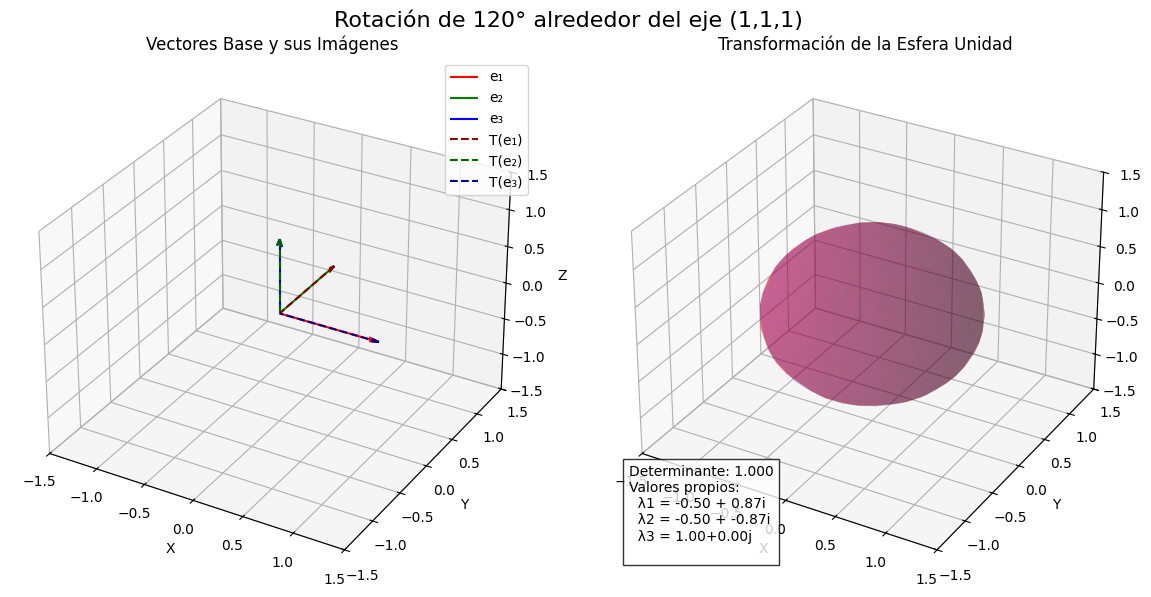


Ejemplo 2: Proyección sobre el plano x + y + z = 0


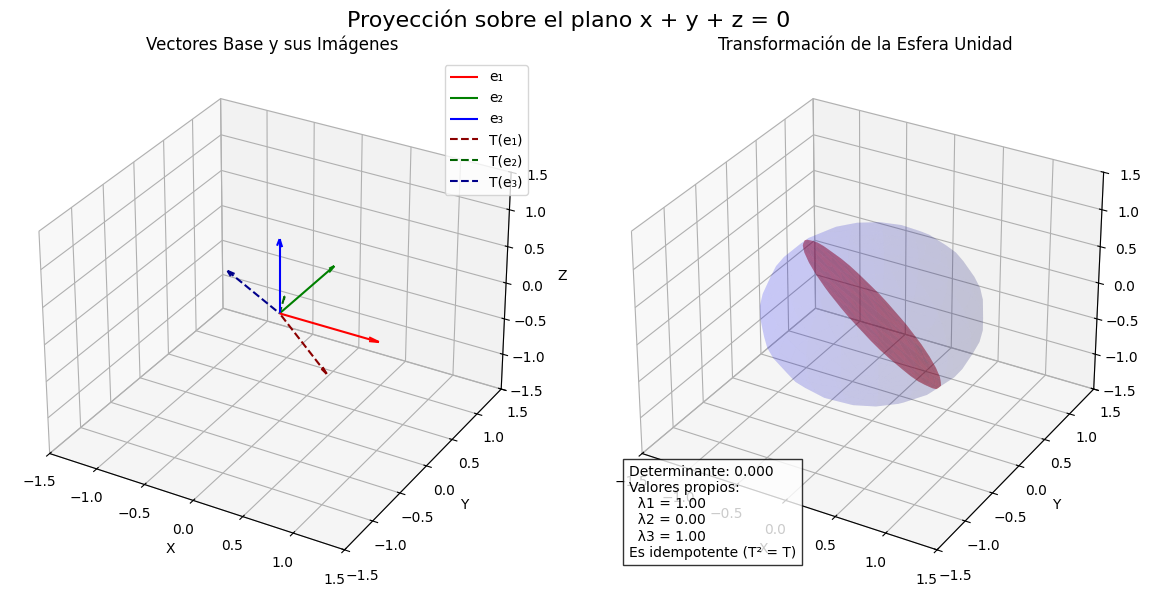


Ejemplo 3: Reflexión respecto al plano x + y + z = 0


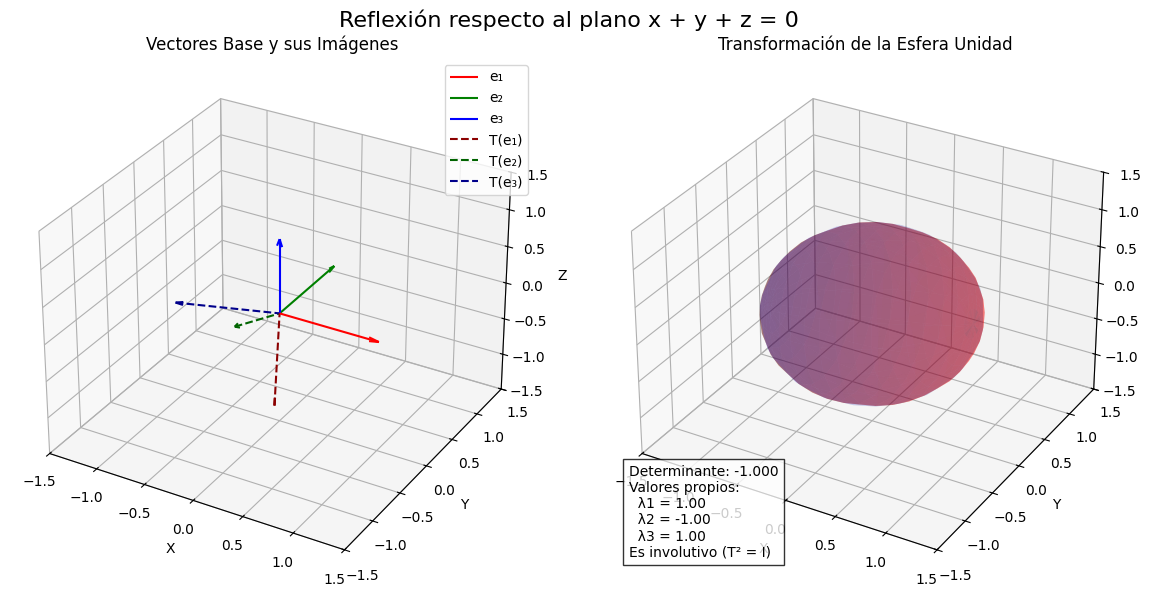


Ejemplo 4: Endomorfismo Nilpotente


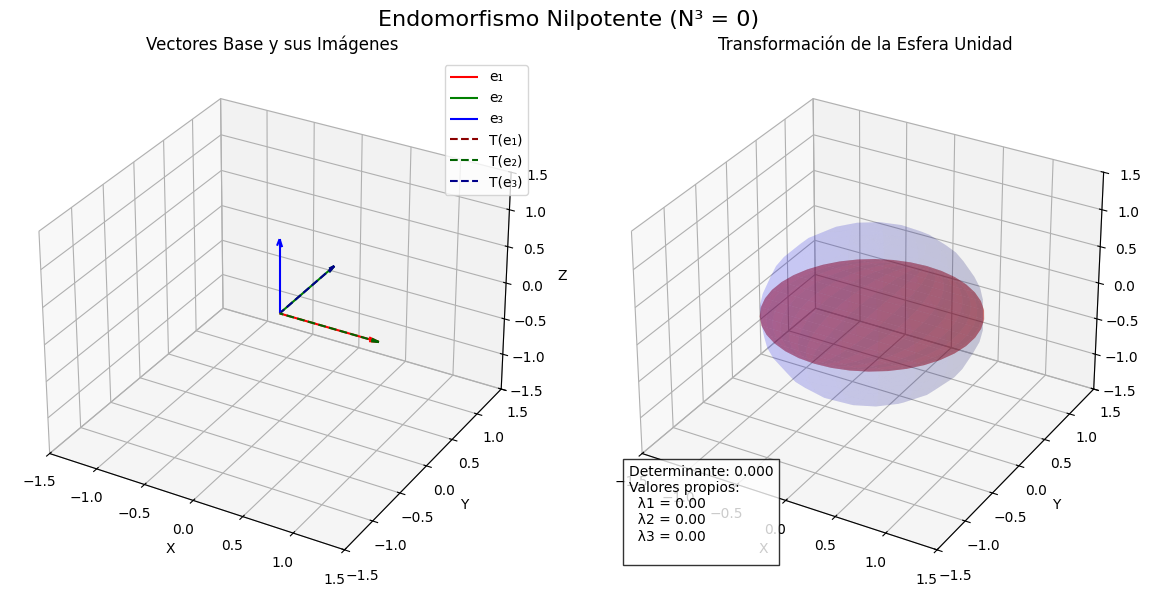

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_endomorphism(T, title):
    """
    Visualiza un endomorfismo en R³, mostrando los vectores base y sus imágenes
    así como el efecto sobre una esfera unidad.

    Args:
        T: Matriz 3x3 del endomorfismo
        title: Título para la visualización
    """
    # Crear figura
    fig = plt.figure(figsize=(12, 6))

    # Límites para los ejes
    axis_limit = 1.5

    # 1. Visualización básica del endomorfismo
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_xlim([-axis_limit, axis_limit])
    ax1.set_ylim([-axis_limit, axis_limit])
    ax1.set_zlim([-axis_limit, axis_limit])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title("Vectores Base y sus Imágenes")

    # Vectores de la base canónica
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Dibujar los ejes coordenados
    ax1.quiver(0, 0, 0, 1, 0, 0, color='r', arrow_length_ratio=0.1, label='e₁')
    ax1.quiver(0, 0, 0, 0, 1, 0, color='g', arrow_length_ratio=0.1, label='e₂')
    ax1.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1, label='e₃')

    # Dibujar las imágenes de los vectores base
    Te1 = T @ e1
    Te2 = T @ e2
    Te3 = T @ e3

    ax1.quiver(0, 0, 0, Te1[0], Te1[1], Te1[2], color='darkred', linestyle='--',
               arrow_length_ratio=0.1, label='T(e₁)')
    ax1.quiver(0, 0, 0, Te2[0], Te2[1], Te2[2], color='darkgreen', linestyle='--',
               arrow_length_ratio=0.1, label='T(e₂)')
    ax1.quiver(0, 0, 0, Te3[0], Te3[1], Te3[2], color='darkblue', linestyle='--',
               arrow_length_ratio=0.1, label='T(e₃)')

    ax1.legend()

    # 2. Transformación de la esfera unidad
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_xlim([-axis_limit, axis_limit])
    ax2.set_ylim([-axis_limit, axis_limit])
    ax2.set_zlim([-axis_limit, axis_limit])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title("Transformación de la Esfera Unidad")

    # Crear una esfera
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Dibujar la esfera original
    ax2.plot_surface(x, y, z, color='blue', alpha=0.1)

    # Transformar la esfera
    x_t = np.zeros_like(x)
    y_t = np.zeros_like(y)
    z_t = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            p = np.array([x[i, j], y[i, j], z[i, j]])
            Tp = T @ p
            x_t[i, j] = Tp[0]
            y_t[i, j] = Tp[1]
            z_t[i, j] = Tp[2]

    # Dibujar la esfera transformada
    ax2.plot_surface(x_t, y_t, z_t, color='red', alpha=0.3)

    # Información adicional
    det_T = np.linalg.det(T)
    eigenvalues = np.linalg.eigvals(T)

    info_text = f"Determinante: {det_T:.3f}\n"
    info_text += f"Valores propios:\n"
    for i, val in enumerate(eigenvalues):
        if np.iscomplex(val):
            info_text += f"  λ{i+1} = {val.real:.2f} + {val.imag:.2f}i\n"
        else:
            info_text += f"  λ{i+1} = {val:.2f}\n"

    # Agregar información de propiedades especiales
    if np.allclose(T @ T, np.eye(3)):
        info_text += "Es involutivo (T² = I)"
    elif np.allclose(T @ T, T):
        info_text += "Es idempotente (T² = T)"

    ax2.text2D(0.05, 0.05, info_text, transform=ax2.transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Ejemplos de endomorfismos
def demonstrate_endomorphisms():
    """Demuestra diferentes tipos de endomorfismos en R³"""

    print("Ejemplo 1: Rotación de 120° alrededor del eje (1,1,1)")
    # Matriz de rotación 120° alrededor del eje (1,1,1)
    R_120 = np.array([
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]
    ])
    plot_endomorphism(R_120, "Rotación de 120° alrededor del eje (1,1,1)")

    print("\nEjemplo 2: Proyección sobre el plano x + y + z = 0")
    # Matriz de proyección sobre el plano x + y + z = 0
    P = np.array([
        [2/3, -1/3, -1/3],
        [-1/3, 2/3, -1/3],
        [-1/3, -1/3, 2/3]
    ])
    plot_endomorphism(P, "Proyección sobre el plano x + y + z = 0")

    print("\nEjemplo 3: Reflexión respecto al plano x + y + z = 0")
    # Matriz de reflexión respecto al plano x + y + z = 0
    S = np.array([
        [1/3, -2/3, -2/3],
        [-2/3, 1/3, -2/3],
        [-2/3, -2/3, 1/3]
    ])
    plot_endomorphism(S, "Reflexión respecto al plano x + y + z = 0")

    print("\nEjemplo 4: Endomorfismo Nilpotente")
    # Matriz de un endomorfismo nilpotente
    N = np.array([
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0]
    ])
    plot_endomorphism(N, "Endomorfismo Nilpotente (N³ = 0)")

# Ejecutar la demostración
if __name__ == "__main__":
    demonstrate_endomorphisms()